In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Uber-Jan-Feb-FOIL.csv to Uber-Jan-Feb-FOIL.csv


# **Load the Data**

In [ ]:
df = pd.read_csv('Uber-Jan-Feb-FOIL.csv')

In [ ]:
# Display basic information
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB
None
       active_vehicles         trips
count       354.000000    354.000000
mean       1307.435028  11667.316384
std        1162.510626  10648.284865
min         112.000000    629.000000
25%         296.750000   2408.500000
50%        1077.000000   9601.000000
75%        1417.000000  13711.250000
max        4395.000000  45858.000000


# **Data Inspection**

In [ ]:
df.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [ ]:
# Summary statistics
print("Summary Statistics:")
print(df.describe())

# Unique bases
print("\nUnique Uber Bases:")
print(df['dispatching_base_number'].unique())

Summary Statistics:
       active_vehicles         trips
count       354.000000    354.000000
mean       1307.435028  11667.316384
std        1162.510626  10648.284865
min         112.000000    629.000000
25%         296.750000   2408.500000
50%        1077.000000   9601.000000
75%        1417.000000  13711.250000
max        4395.000000  45858.000000

Unique Uber Bases:
['B02512' 'B02765' 'B02764' 'B02682' 'B02617' 'B02598']


In [ ]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract month, day, and day of week
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6
df['weekend'] = df['day_of_week'].isin([5, 6])

In [ ]:
df.head()

,dispatching_base_number,date,active_vehicles,trips,month,day,day_of_week,weekend
0,B02512,2015-01-01,190,1132,1,1,3,False
1,B02765,2015-01-01,225,1765,1,1,3,False
2,B02764,2015-01-01,3427,29421,1,1,3,False
3,B02682,2015-01-01,945,7679,1,1,3,False
4,B02617,2015-01-01,1228,9537,1,1,3,False


# **Exploratory Data Analysis and Data pre-processing**

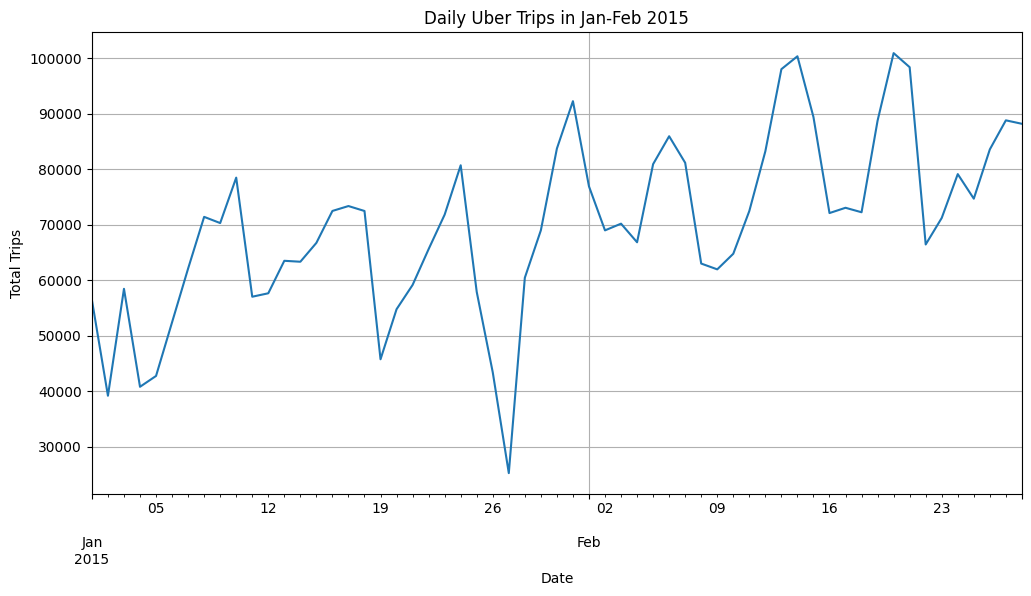

In [ ]:
# Plot trips over time
plt.figure(figsize=(12, 6))
df.groupby('date')['trips'].sum().plot()
plt.title('Daily Uber Trips in Jan-Feb 2015')
plt.ylabel('Total Trips')
plt.xlabel('Date')
plt.grid()
plt.show()

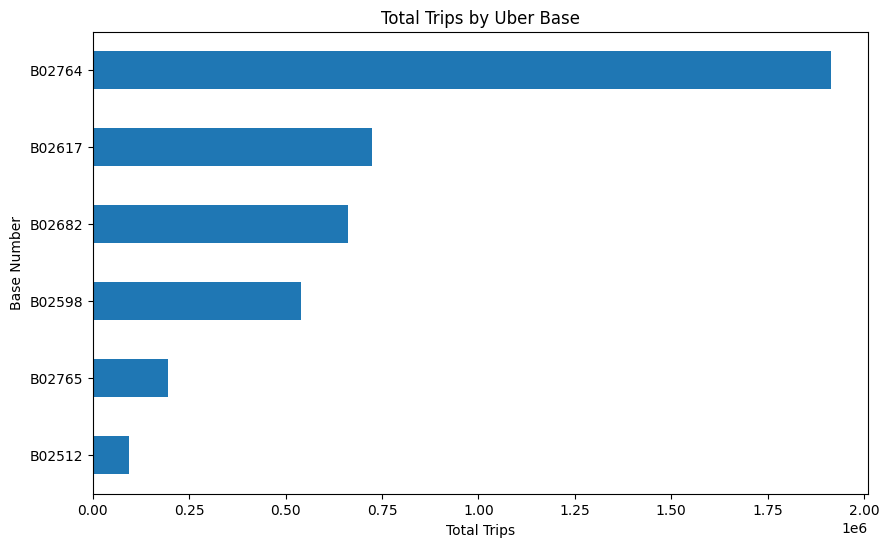

In [ ]:
# Base-wise trip distribution
plt.figure(figsize=(10, 6))
df.groupby('dispatching_base_number')['trips'].sum().sort_values().plot(kind='barh')
plt.title('Total Trips by Uber Base')
plt.xlabel('Total Trips')
plt.ylabel('Base Number')
plt.show()

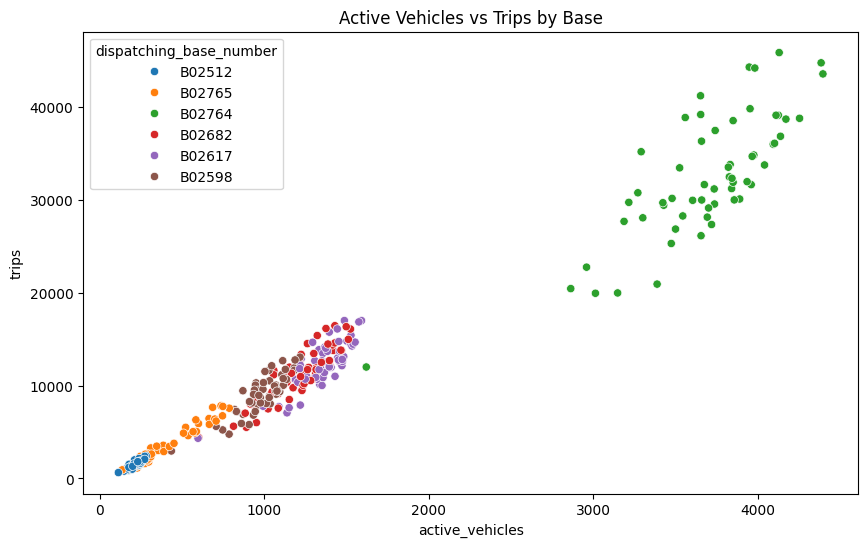

In [ ]:
# Base-wise active vehicles vs trips
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='active_vehicles', y='trips', hue='dispatching_base_number')
plt.title('Active Vehicles vs Trips by Base')
plt.show()

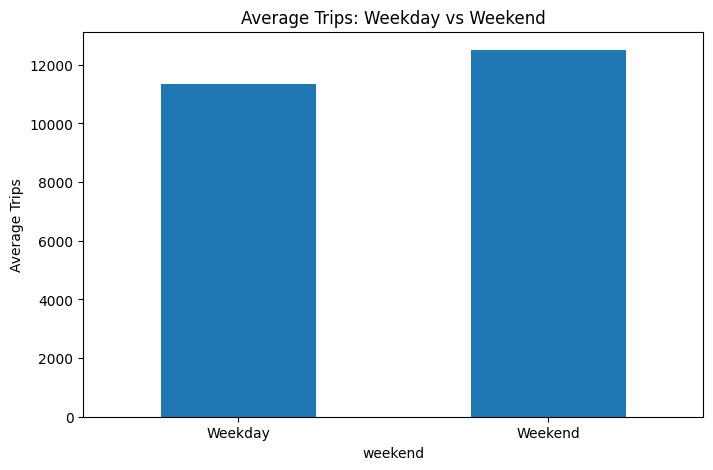

In [ ]:
# Weekday vs weekend trips
plt.figure(figsize=(8, 5))
df.groupby('weekend')['trips'].mean().plot(kind='bar')
plt.title('Average Trips: Weekday vs Weekend')
plt.ylabel('Average Trips')
plt.xticks([0, 1], ['Weekday', 'Weekend'], rotation=0)
plt.show()

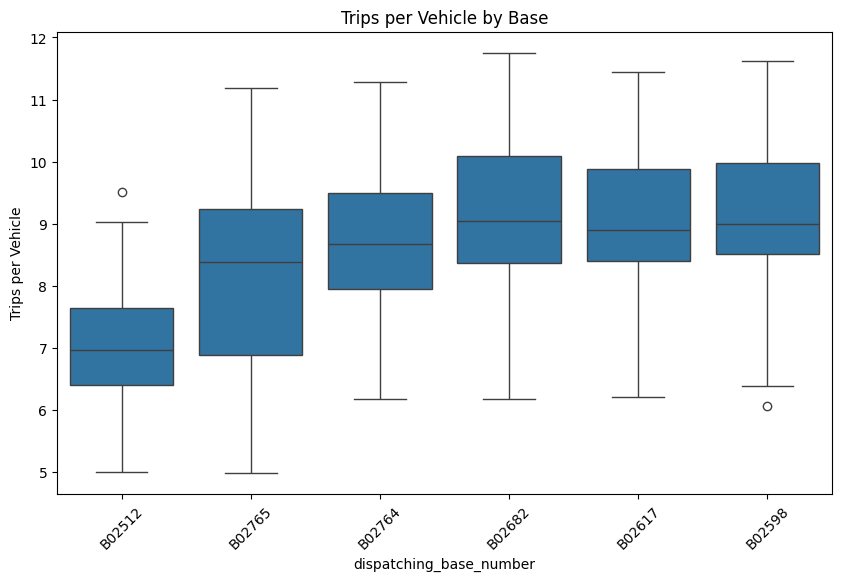

In [ ]:
# Calculate trips per vehicle
df['trips_per_vehicle'] = df['trips'] / df['active_vehicles']

# Plot utilization by base
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='dispatching_base_number', y='trips_per_vehicle')
plt.title('Trips per Vehicle by Base')
plt.xticks(rotation=45)
plt.ylabel('Trips per Vehicle')
plt.show()

In [ ]:
# Create features
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
df['trips_per_vehicle'] = df['trips'] / df['active_vehicles']
df.sort_values(['dispatching_base_number', 'date'], inplace=True)
df['prev_day_trips'] = df.groupby('dispatching_base_number')['trips'].shift(1)
df.to_csv('my_data.csv', index=False)

In [ ]:
df.head()

,dispatching_base_number,date,active_vehicles,trips,month,day,day_of_week,weekend,trips_per_vehicle,is_weekend,prev_day_trips
0,B02512,2015-01-01,190,1132,1,1,3,False,5.957895,0,NaN
8,B02512,2015-01-02,175,875,1,2,4,False,5.000000,0,1132.0
16,B02512,2015-01-03,173,1088,1,3,5,True,6.289017,1,875.0
18,B02512,2015-01-04,147,791,1,4,6,True,5.380952,1,1088.0
24,B02512,2015-01-05,194,984,1,5,0,False,5.072165,0,791.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354 entries, 0 to 353
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dispatching_base_number  354 non-null    object        
 1   date                     354 non-null    datetime64[ns]
 2   active_vehicles          354 non-null    int64         
 3   trips                    354 non-null    int64         
 4   month                    354 non-null    int32         
 5   day                      354 non-null    int32         
 6   day_of_week              354 non-null    int32         
 7   weekend                  354 non-null    bool          
 8   trips_per_vehicle        354 non-null    float64       
 9   is_weekend               354 non-null    int64         
 10  prev_day_trips           348 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int32(3), int64(3), object(1)
memory usage: 26.6+ KB


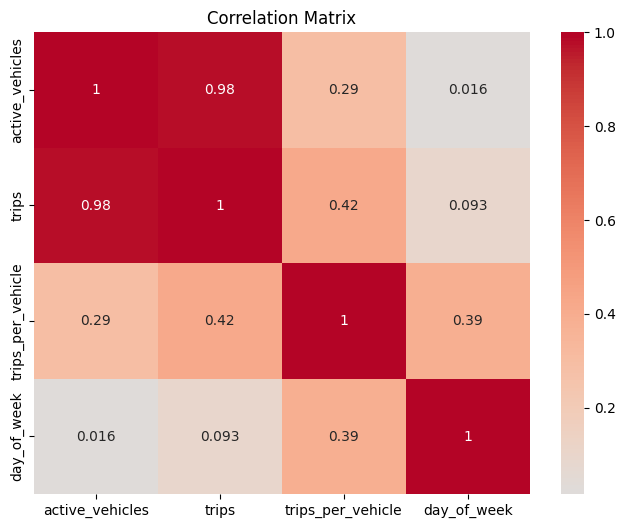

In [ ]:
# Correlation matrix
corr = df[['active_vehicles', 'trips', 'trips_per_vehicle', 'day_of_week']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

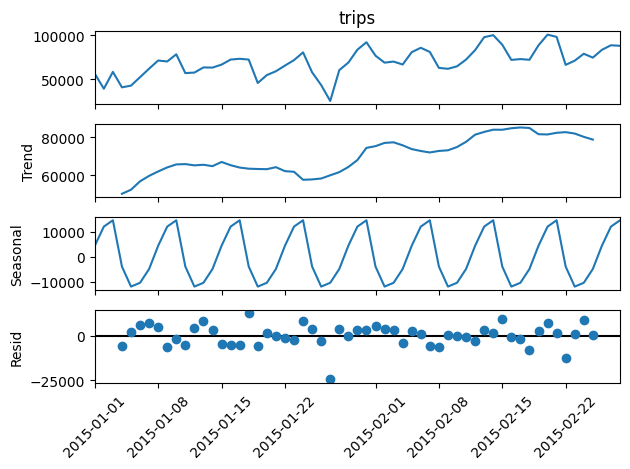

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Create a time series for total daily trips
daily_trips = df.groupby('date')['trips'].sum()

# Decompose the time series
result = seasonal_decompose(daily_trips, model='additive', period=7)
result.plot()
plt.xticks(rotation=45)  # Rotate labels 45 degrees
plt.tight_layout()       # Adjust layout to prevent clipping
plt.show()
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  trips   No. Observations:                   52
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -543.158
Date:                Tue, 22 Apr 2025   AIC                           1096.317
Time:                        11:06:15   BIC                           1105.976
Sample:                    01-01-2015   HQIC                          1100.008
                         - 02-21-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3156      0.189      1.671      0.095      -0.055       0.686
ar.L2          0.0878      0.118      0.747      0.455      -0.143       0.318
ar.L3         -0.4604      0.125     -3.688      0.0

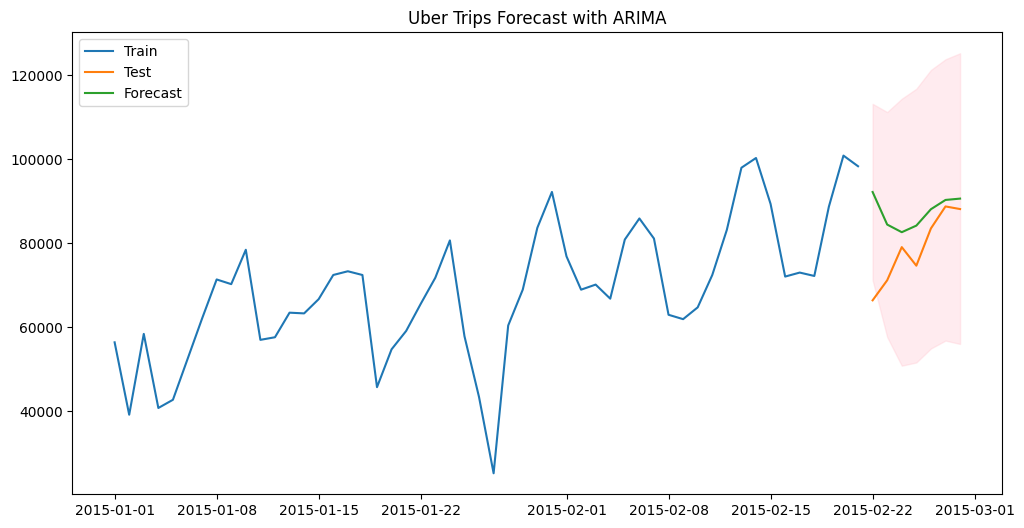

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Prepare the data correctly
daily_trips = df.groupby('date')['trips'].sum().reset_index()
daily_trips.set_index('date', inplace=True)

# Ensure proper frequency is set
daily_trips = daily_trips.asfreq('D')

# Split into train and test (last 7 days as test)
train = daily_trips.iloc[:-7]
test = daily_trips.iloc[-7:]

# Fit ARIMA model
try:
    model = ARIMA(train, order=(3,1,1))  # Simpler model
    model_fit = model.fit()
    print(model_fit.summary())

    # Forecast correctly
    forecast = model_fit.get_forecast(steps=7)
    forecast_values = forecast.predicted_mean
    confidence_intervals = forecast.conf_int()

    # Evaluate
    rmse = sqrt(mean_squared_error(test['trips'], forecast_values))
    print(f'Test RMSE: {rmse:.3f}')

    # Plot
    plt.figure(figsize=(12,6))
    plt.plot(train.index, train['trips'], label='Train')
    plt.plot(test.index, test['trips'], label='Test')
    plt.plot(test.index, forecast_values, label='Forecast')
    plt.fill_between(test.index,
                    confidence_intervals.iloc[:, 0],
                    confidence_intervals.iloc[:, 1],
                    color='pink', alpha=0.3)
    plt.title('Uber Trips Forecast with ARIMA')
    plt.legend()
    plt.show()

except Exception as e:
    print(f"Error in ARIMA modeling: {str(e)}")
    print("Trying alternative approach...")

    # Fallback to simple moving average
    train_vals = train['trips'].values
    forecast_vals = [np.mean(train_vals[-7:])] * 7  # 7-day moving average
    rmse = sqrt(mean_squared_error(test['trips'], forecast_vals))
    print(f'Simple 7-day MA RMSE: {rmse:.3f}')

                                     SARIMAX Results                                     
Dep. Variable:                             trips   No. Observations:                   52
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                -372.982
Date:                           Tue, 22 Apr 2025   AIC                            755.963
Time:                                   11:06:17   BIC                            763.740
Sample:                               01-01-2015   HQIC                           758.648
                                    - 02-21-2015                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0050      0.978     -0.005      0.996      -1.922       1.912
ma.L1         -0.3619      0.831     -0.436

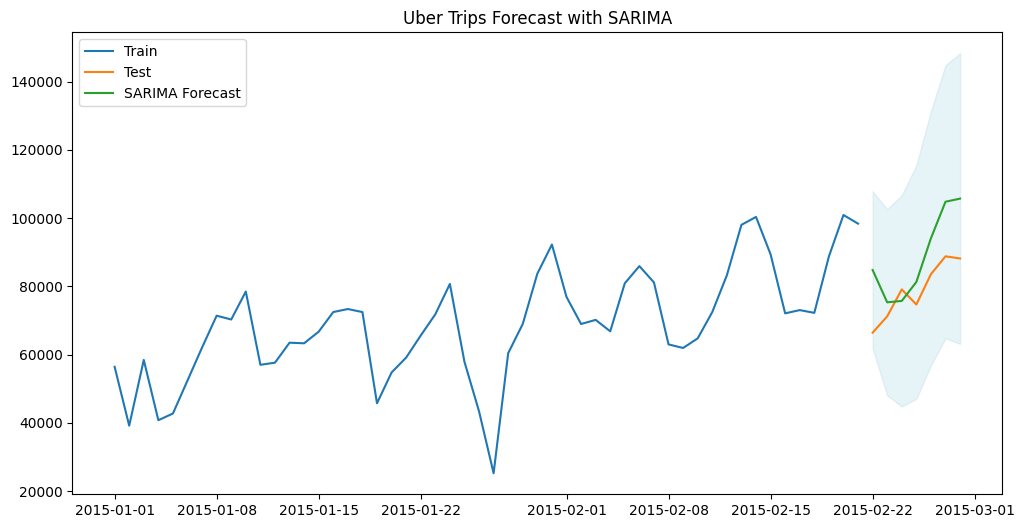

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

try:
    # SARIMA model with weekly seasonality (7 days)
    model = SARIMAX(train,
                  order=(1, 1, 1),
                  seasonal_order=(1, 1, 1, 7),
                  enforce_stationarity=False,
                  enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    print(model_fit.summary())

    # Forecast
    forecast = model_fit.get_forecast(steps=7)
    forecast_values = forecast.predicted_mean
    confidence_intervals = forecast.conf_int()

    # Evaluate
    rmse = sqrt(mean_squared_error(test['trips'], forecast_values))
    print(f'SARIMA Test RMSE: {rmse:.3f}')

    # Plot
    plt.figure(figsize=(12,6))
    plt.plot(train.index, train['trips'], label='Train')
    plt.plot(test.index, test['trips'], label='Test')
    plt.plot(test.index, forecast_values, label='SARIMA Forecast')
    plt.fill_between(test.index,
                    confidence_intervals.iloc[:, 0],
                    confidence_intervals.iloc[:, 1],
                    color='lightblue', alpha=0.3)
    plt.title('Uber Trips Forecast with SARIMA')
    plt.legend()
    plt.show()

except Exception as e:
    print(f"Error in SARIMA modeling: {str(e)}")

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5egmqfjr/ru80ade4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5egmqfjr/eews07v9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47554', 'data', 'file=/tmp/tmp5egmqfjr/ru80ade4.json', 'init=/tmp/tmp5egmqfjr/eews07v9.json', 'output', 'file=/tmp/tmp5egmqfjr/prophet_model295f5bhe/prophet_model-20250422110620.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:06:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:06:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet Test RMSE: 11043.166


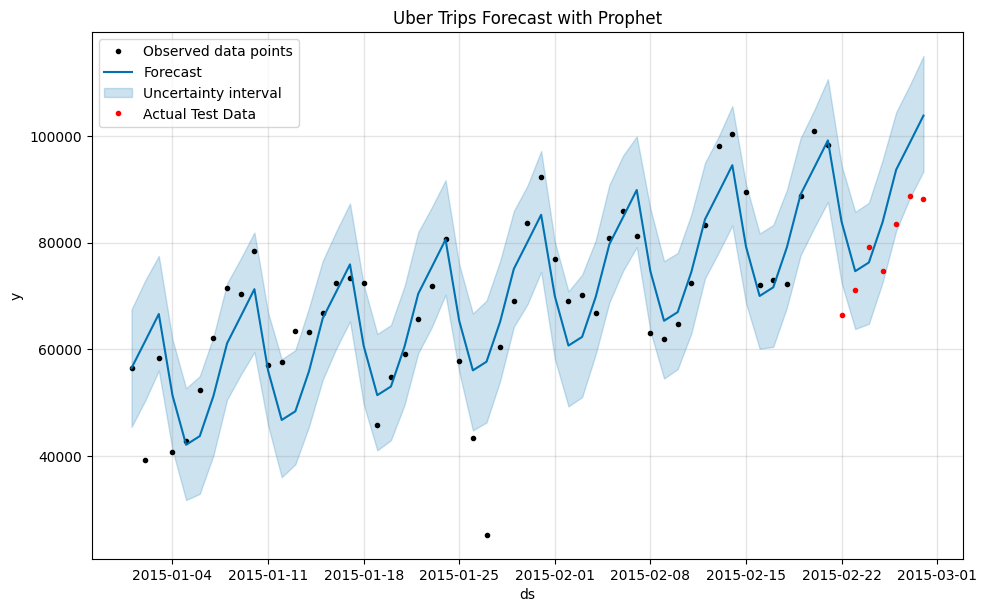

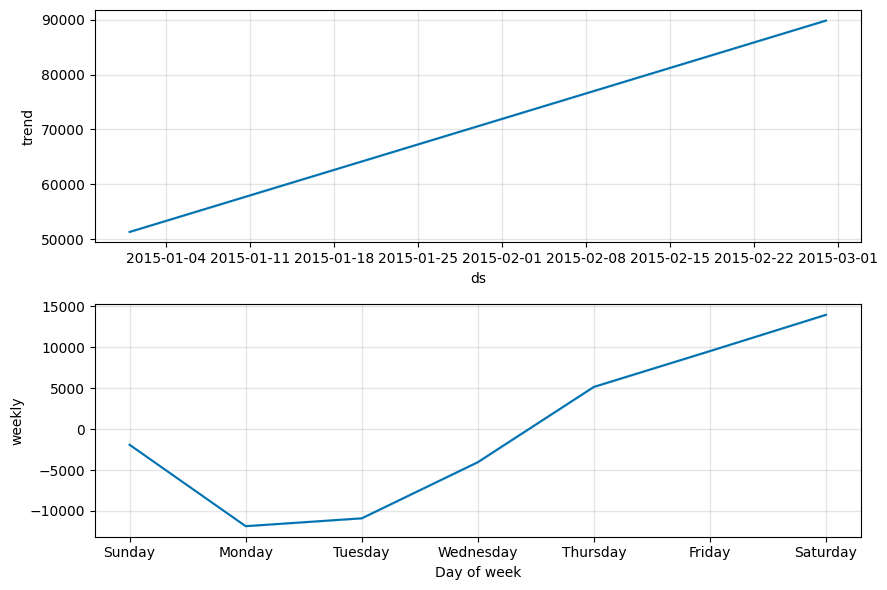

In [ ]:
from prophet import Prophet

try:
    # Prepare data for Prophet
    prophet_df = daily_trips.reset_index()
    prophet_df.columns = ['ds', 'y']

    # Split train/test
    train = prophet_df.iloc[:-7]
    test = prophet_df.iloc[-7:]

    # Fit model
    model = Prophet(weekly_seasonality=True, daily_seasonality=False)
    model.fit(train)

    # Create future dataframe
    future = model.make_future_dataframe(periods=7)

    # Forecast
    forecast = model.predict(future)

    # Evaluate
    preds = forecast.iloc[-7:]['yhat']
    rmse = sqrt(mean_squared_error(test['y'], preds))
    print(f'Prophet Test RMSE: {rmse:.3f}')

    # Plot
    fig = model.plot(forecast)
    plt.plot(test['ds'], test['y'], 'r.', label='Actual Test Data')
    plt.title('Uber Trips Forecast with Prophet')
    plt.legend()
    plt.show()

    # Plot components
    fig2 = model.plot_components(forecast)

except Exception as e:
    print(f"Error with Prophet: {str(e)}")

In [ ]:
#Demand Prediction Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Prepare features
features = df.copy()
features = pd.get_dummies(features, columns=['dispatching_base_number', 'day_of_week'])

# Remove date and target-related columns
X = features.drop(['date', 'trips', 'trips_per_vehicle'], axis=1)
y = features['trips']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate
y_pred = rf.predict(X_test)
print(f'R-squared: {r2_score(y_test, y_pred):.3f}')

R-squared: 0.974


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation
scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print(f'Cross-validated R-squared: {scores.mean():.3f} (+/- {scores.std()*2:.3f})')

Cross-validated R-squared: 0.874 (+/- 0.213)


<Figure size 1600x800 with 0 Axes>

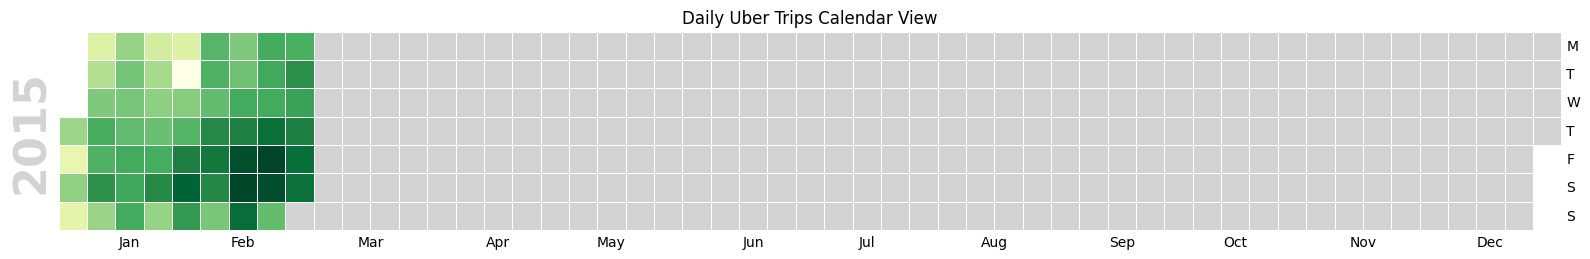

In [ ]:
import calmap

# Prepare data for calendar plot
daily_trips = df.groupby('date')['trips'].sum()
plt.figure(figsize=(16,8))
calmap.calendarplot(daily_trips, monthticks=1, daylabels='MTWTFSS',
                    cmap='YlGn', fillcolor='lightgrey',
                    linewidth=0.5, fig_kws={'figsize': (16,8)})
plt.title('Daily Uber Trips Calendar View')
plt.show()

In [ ]:
import plotly.express as px

# Base-wise time series
fig = px.line(df, x='date', y='trips', color='dispatching_base_number',
              title='Uber Trips by Base Over Time',
              labels={'trips': 'Number of Trips', 'date': 'Date'})
fig.show()

In [ ]:
fig = px.scatter_3d(df, x='active_vehicles', y='trips_per_vehicle', z='trips',
                    color='dispatching_base_number',
                    title='Vehicle Utilization Analysis',
                    labels={'active_vehicles': 'Active Vehicles',
                           'trips_per_vehicle': 'Trips per Vehicle',
                           'trips': 'Total Trips'},
                    template='plotly_dark')
fig.show()

# **Uber Daily trip Demand Prediction**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Train predictions
y_train_pred = rf.predict(X_train)

# Metrics
def print_metrics(y_true, y_pred, dataset=""):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{dataset} R²: {r2:.3f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}")

print_metrics(y_train, y_train_pred, "Train")
print_metrics(y_test, y_pred, "Test")

Train R²: 0.998, MAE: 304.00, RMSE: 484.66
Test R²: 0.974, MAE: 941.97, RMSE: 1802.94


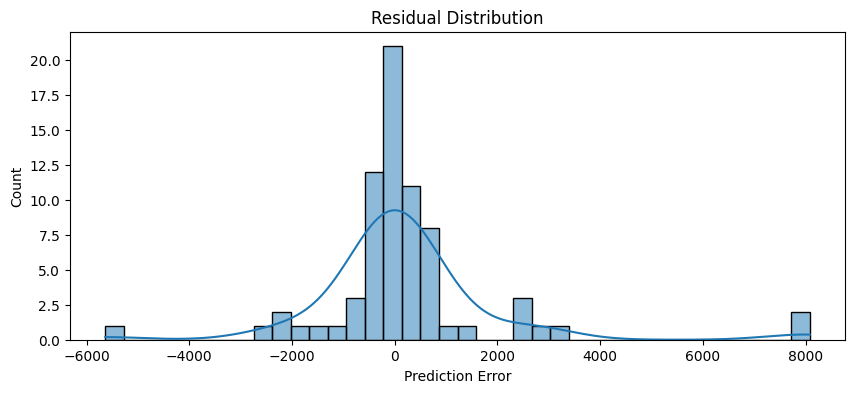

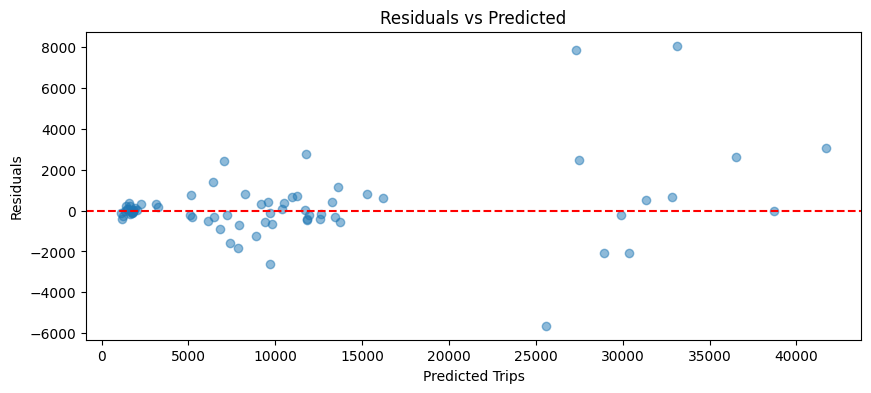

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 4))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Prediction Error")
plt.show()

plt.figure(figsize=(10, 4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Trips")
plt.ylabel("Residuals")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print(f"CV R² scores: {cv_scores}")
print(f"Average CV R²: {cv_scores.mean():.3f}")

CV R² scores: [0.97347205 0.69335282 0.8745103  0.84262039 0.98839903]
Average CV R²: 0.874


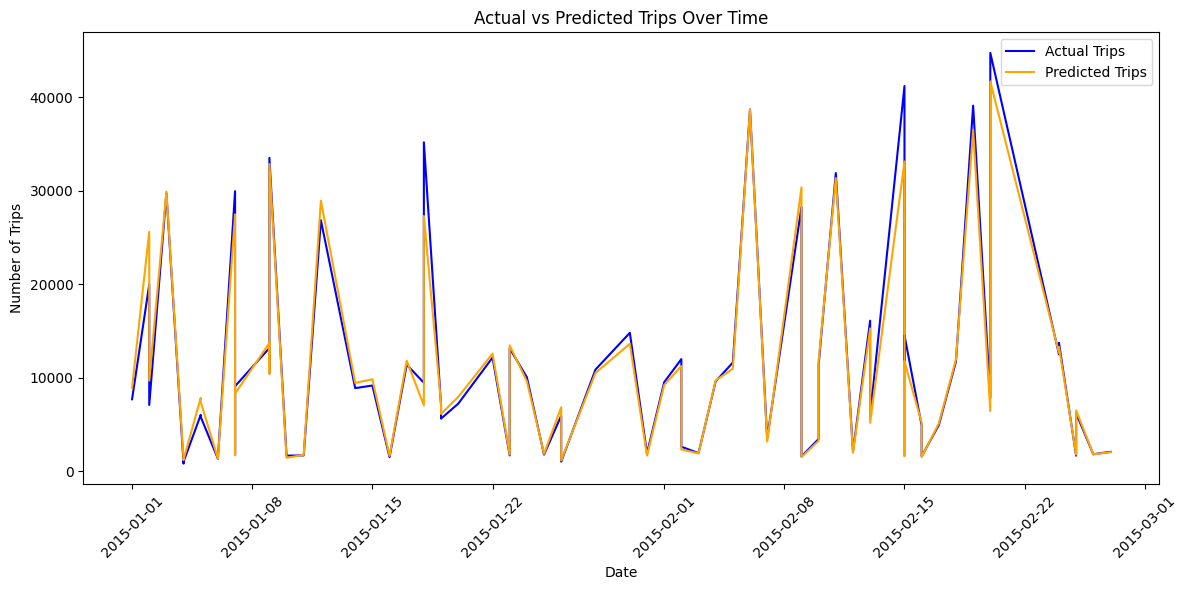

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get test data with dates
X_test_with_date = df.loc[X_test.index].copy()
X_test_with_date['actual_trips'] = y_test.values
X_test_with_date['predicted_trips'] = y_pred

# Sort by date for correct plotting
X_test_with_date = X_test_with_date.sort_values('date')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(X_test_with_date['date'], X_test_with_date['actual_trips'], label='Actual Trips', color='blue')
plt.plot(X_test_with_date['date'], X_test_with_date['predicted_trips'], label='Predicted Trips', color='orange')
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.title("Actual vs Predicted Trips Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

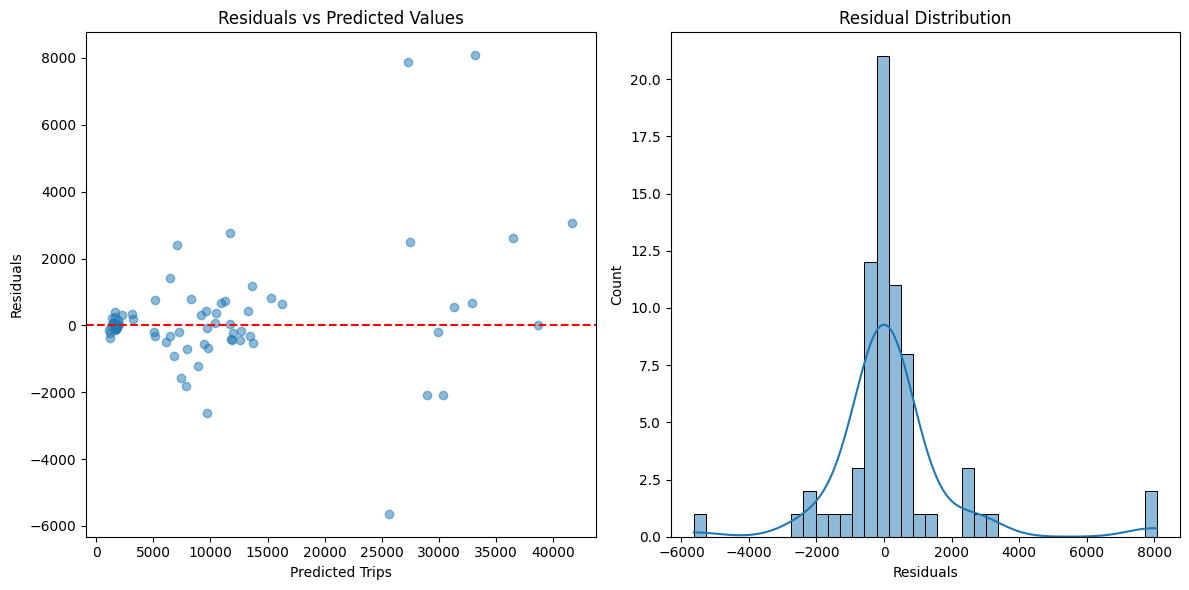

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(12, 6))

# Residuals vs Predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Trips')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

# Residual distribution
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residual Distribution')

plt.tight_layout()
plt.show()

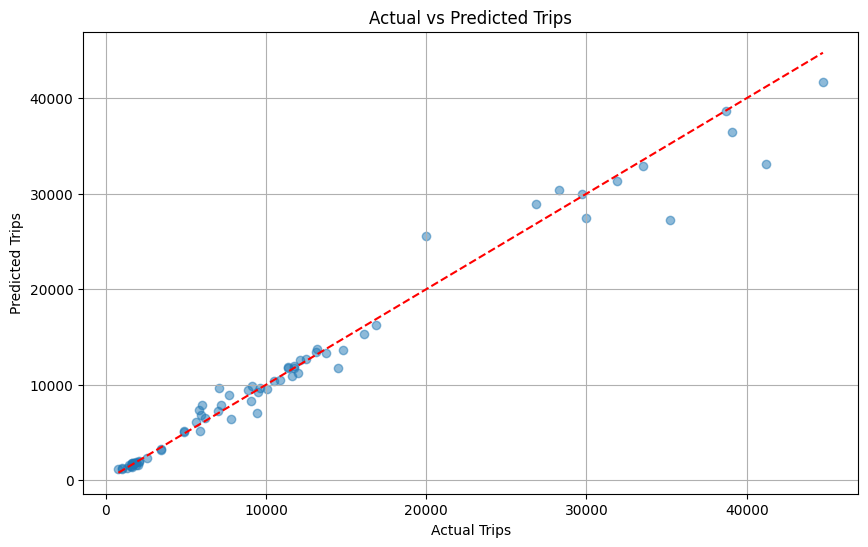

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Trips')
plt.ylabel('Predicted Trips')
plt.title('Actual vs Predicted Trips')
plt.grid(True)
plt.show()

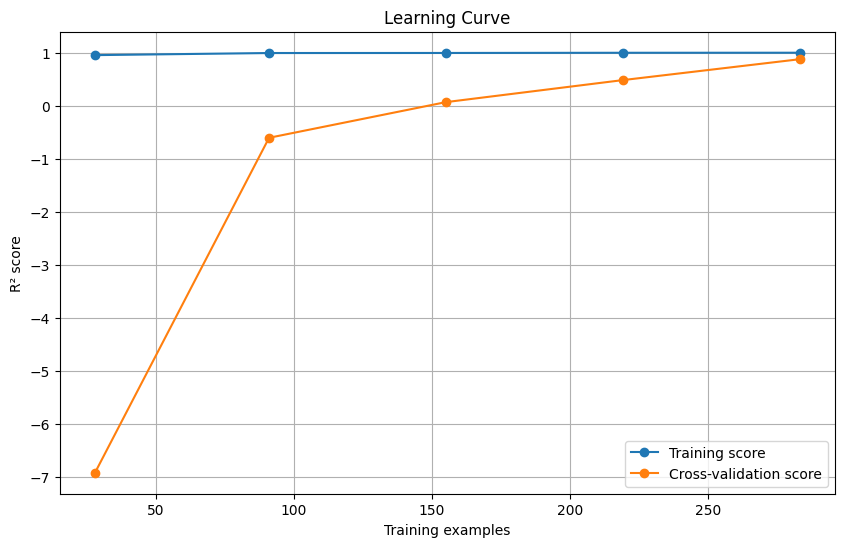

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    rf, X, y, cv=5, scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 5))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('R² score')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df_cleaned = df.dropna()

features = df_cleaned.copy()
features = pd.get_dummies(features, columns=['dispatching_base_number', 'day_of_week'])

X = features.drop(['date', 'trips', 'trips_per_vehicle'], axis=1)
y = features['trips']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models to compare
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42, verbose=-1)
}

# Prepare evaluation metrics
results = []
for name, model in models.items():
    start_time = time.time()

    # Cross-validation (5-fold)
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    cv_rmse = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')

    # Fit model on full training data for feature importance
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    end_time = time.time()

    results.append({
        'Model': name,
        'R2 Mean': cv_scores.mean(),
        'R2 Std': cv_scores.std(),
        'RMSE Mean': -cv_rmse.mean(),
        'RMSE Std': cv_rmse.std(),
        'Train R2': train_score,
        'Test R2': test_score,
        'Time (s)': end_time - start_time
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values('R2 Mean', ascending=False)
results_df

,Model,R2 Mean,R2 Std,RMSE Mean,RMSE Std,Train R2,Test R2,Time (s)
2,Gradient Boosting,0.902529,0.071524,1461.454554,1195.899631,0.998728,0.981398,1.217882
0,Random Forest,0.880266,0.097502,1569.712845,1256.805121,0.996884,0.980426,2.680236
1,XGBoost,0.868772,0.113036,1737.757819,1582.973355,1.000000,0.978950,1.110197
3,LightGBM,0.833402,0.167260,2238.272140,2442.768680,0.992264,0.982181,0.308024


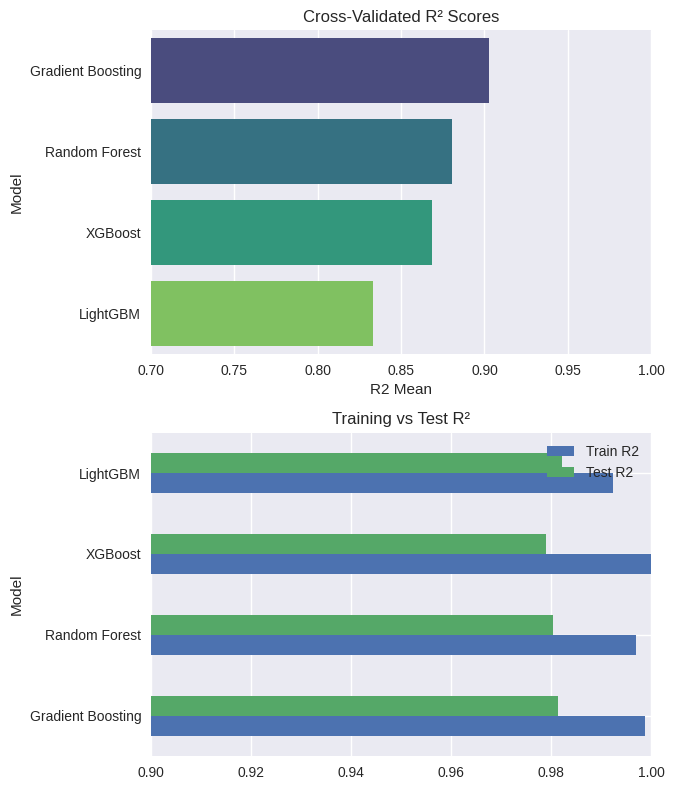

In [ ]:
# Set style
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 8))

# R2 Scores comparison
plt.subplot(2, 2, 1)
sns.barplot(x='R2 Mean', y='Model', data=results_df, palette='viridis')
plt.title('Cross-Validated R² Scores')
plt.xlim(0.7, 1.0)


# Training vs Test R2
plt.subplot(2, 2, 3)
results_df.set_index('Model')[['Train R2', 'Test R2']].plot(kind='barh', ax=plt.gca())
plt.title('Training vs Test R²')
plt.xlim(0.9, 1.0)
plt.legend(loc='upper right')


plt.tight_layout()
plt.show()

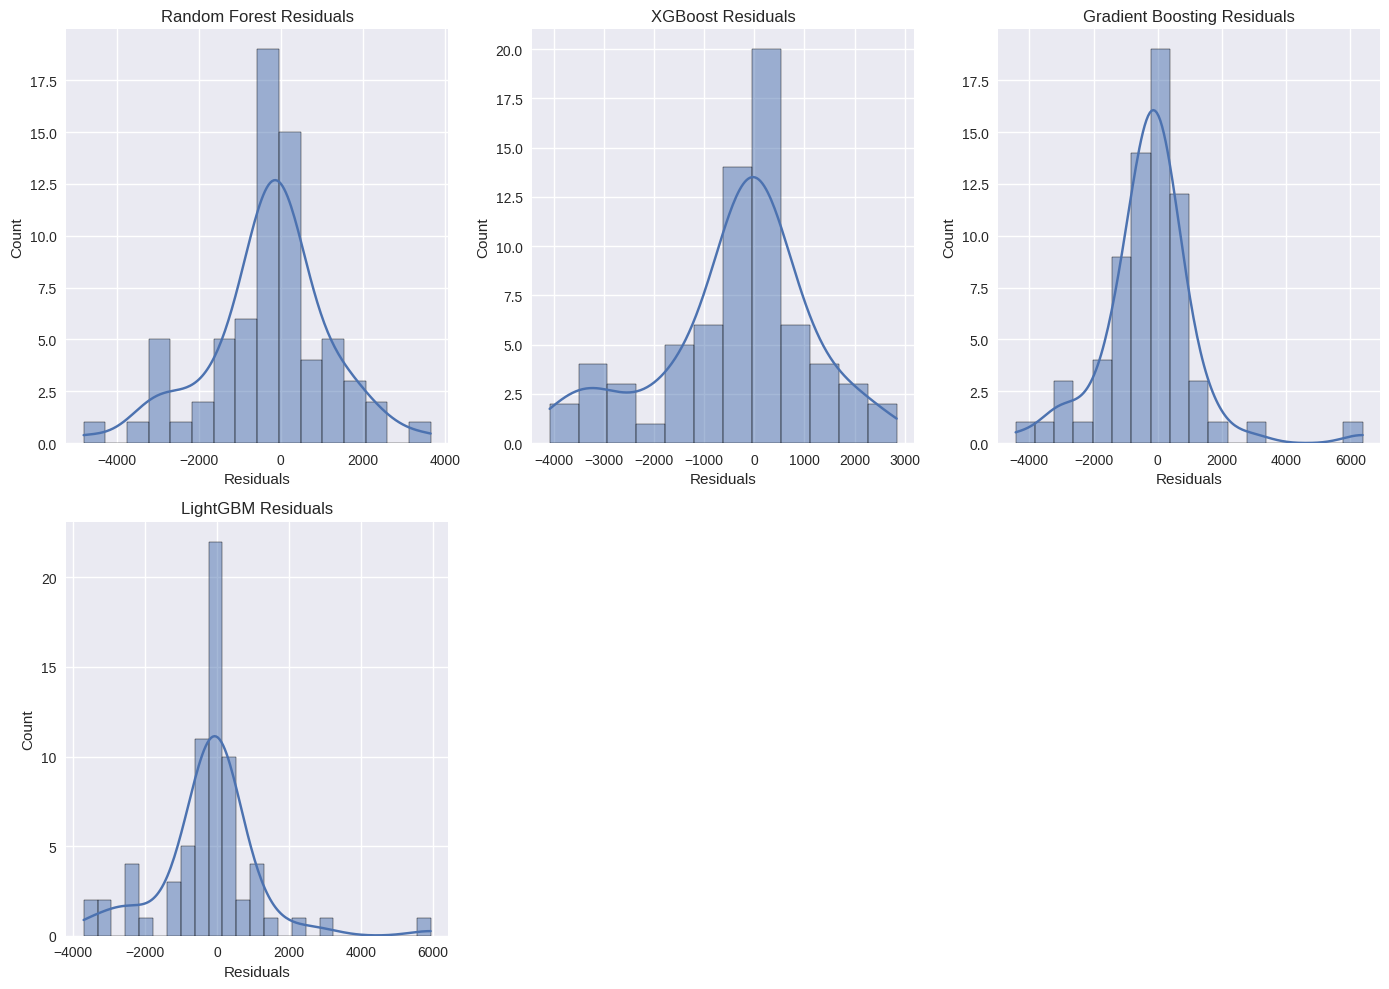

In [ ]:
plt.figure(figsize=(14, 10))
for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred

    plt.subplot(2, 3, i)
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.title(f'{name} Residuals')
    plt.grid(True)

plt.tight_layout()
plt.show()

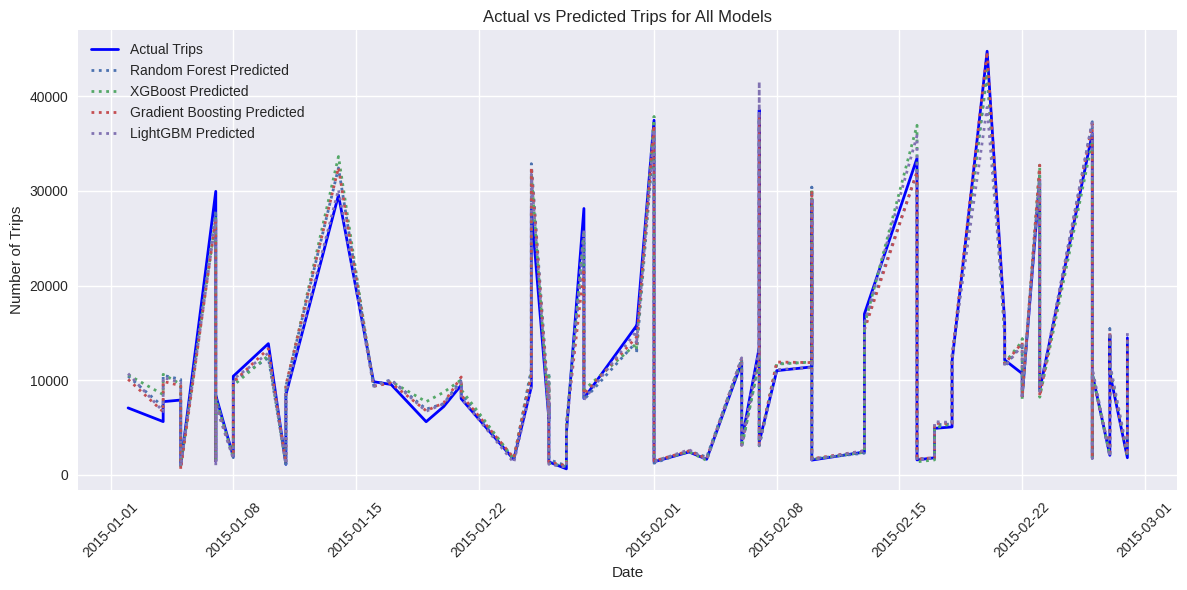

In [ ]:
# Add actual and predicted to original df using test indices
test_with_date = df_cleaned.loc[X_test.index].copy()
test_with_date['actual_trips'] = y_test.values
test_with_date['predicted_trips'] = y_pred
test_with_date = test_with_date.sort_values('date')
# Plot Actual vs Predicted for All Models in One Plot
plt.figure(figsize=(12, 6))

# Plot the actual trips once (solid line)
plt.plot(test_with_date['date'], test_with_date['actual_trips'], label='Actual Trips', color='blue', linewidth=2)

# Loop through each model and plot predicted trips with dotted lines
for name, model in models.items():
    # Predict on test set
    y_pred = model.predict(X_test)

    # Add predicted trips to original df using test indices
    test_with_date = df_cleaned.loc[X_test.index].copy()
    test_with_date['predicted_trips'] = y_pred
    test_with_date = test_with_date.sort_values('date')

    # Plot predicted trips for each model with dotted lines
    plt.plot(test_with_date['date'], test_with_date['predicted_trips'],
             label=f'{name} Predicted', linestyle=':', linewidth=2)  # Dotted line style

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.title("Actual vs Predicted Trips for All Models")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

Individual Model MAPE Scores:
Random Forest       : 11.02%
XGBoost             : 11.01%
Gradient Boosting   : 10.41%
LightGBM            : 9.52%

Model Weights:
Random Forest       : 0.237
XGBoost             : 0.237
Gradient Boosting   : 0.251
LightGBM            : 0.274

Ensemble MAPE: 9.40%

Performance Comparison:
Model                 MAPE      
------------------------------
Random Forest       : 11.02%
XGBoost             : 11.01%
Gradient Boosting   : 10.41%
LightGBM            : 9.52%
Ensemble            : 9.40%


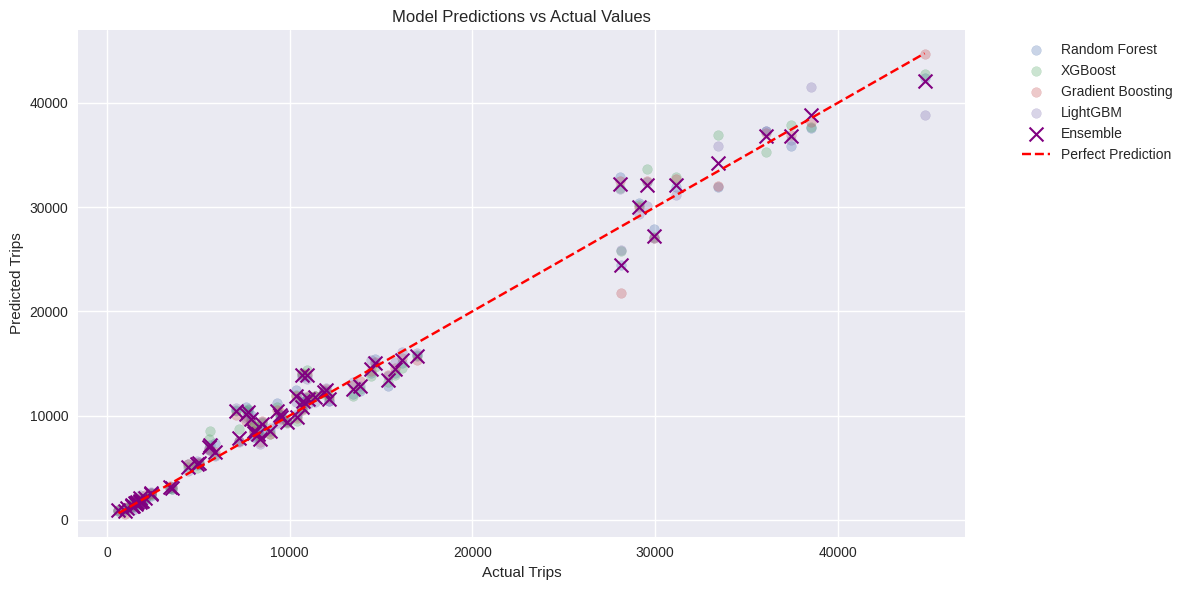

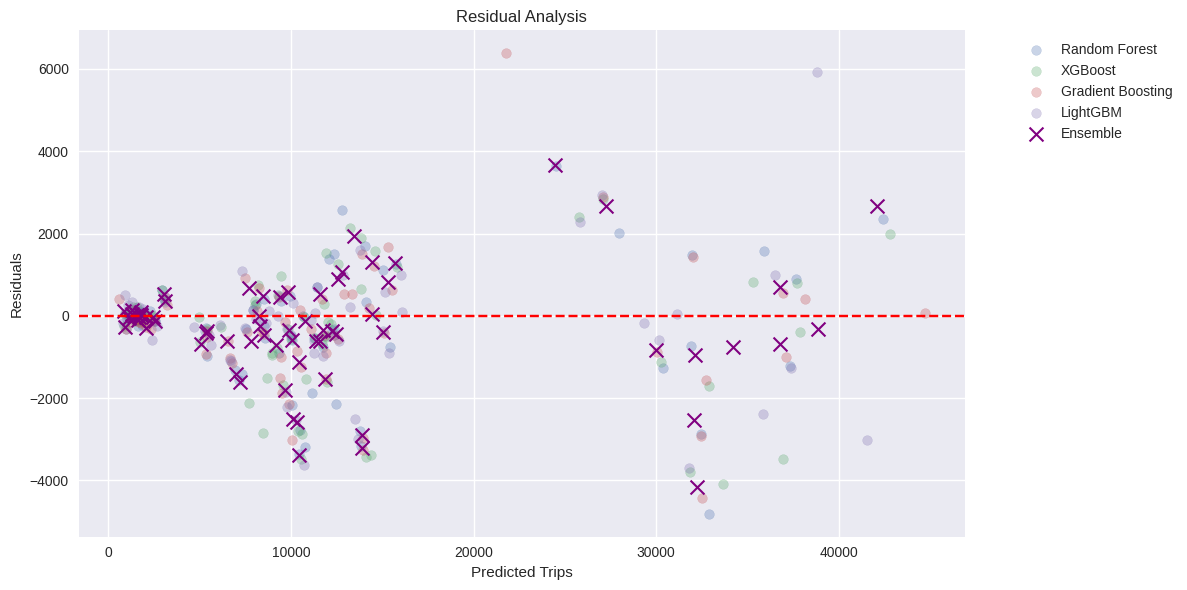

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
# First convert y_test to float to avoid type conflicts
y_test = y_test.astype(float)

# Get predictions from each model on the test set
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test).astype(float)  # Ensure float dtype

# Calculate MAPE for each model
mape_scores = {}
for name, pred in predictions.items():
    mape_scores[name] = mean_absolute_percentage_error(y_test, pred)

print("Individual Model MAPE Scores:")
for name, mape in mape_scores.items():
    print(f"{name:<20}: {mape:.2%}")

# Calculate weights based on MAPE (lower MAPE gets higher weight)
reciprocal_mape = {name: 1/mape for name, mape in mape_scores.items()}
total = sum(reciprocal_mape.values())
weights = {name: (rm/total) for name, rm in reciprocal_mape.items()}

print("\nModel Weights:")
for name, weight in weights.items():
    print(f"{name:<20}: {weight:.3f}")

# Create weighted ensemble predictions
ensemble_pred = np.zeros_like(y_test, dtype=float)  # Explicit float dtype
for name, pred in predictions.items():
    ensemble_pred += weights[name] * pred

# Evaluate ensemble
ensemble_mape = mean_absolute_percentage_error(y_test, ensemble_pred)
print(f"\nEnsemble MAPE: {ensemble_mape:.2%}")

# Compare all models
print("\nPerformance Comparison:")
print(f"{'Model':<20}  {'MAPE':<10}")
print("-"*30)
for name, mape in mape_scores.items():
    print(f"{name:<20}: {mape:.2%}")
print(f"{'Ensemble':<20}: {ensemble_mape:.2%}")


# Visual comparison
plt.figure(figsize=(12, 6))
for name, pred in predictions.items():
    plt.scatter(y_test, pred, alpha=0.3, label=name)
plt.scatter(y_test, ensemble_pred, color='purple', marker='x',
            s=100, label='Ensemble', linewidths=1.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', label='Perfect Prediction')
plt.xlabel('Actual Trips')
plt.ylabel('Predicted Trips')
plt.title('Model Predictions vs Actual Values')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual plot comparison
plt.figure(figsize=(12, 6))
for name, pred in predictions.items():
    residuals = y_test - pred
    plt.scatter(pred, residuals, alpha=0.3, label=name)
ensemble_residuals = y_test - ensemble_pred
plt.scatter(ensemble_pred, ensemble_residuals, color='purple',
            marker='x', s=100, label='Ensemble', linewidths=1.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Trips')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

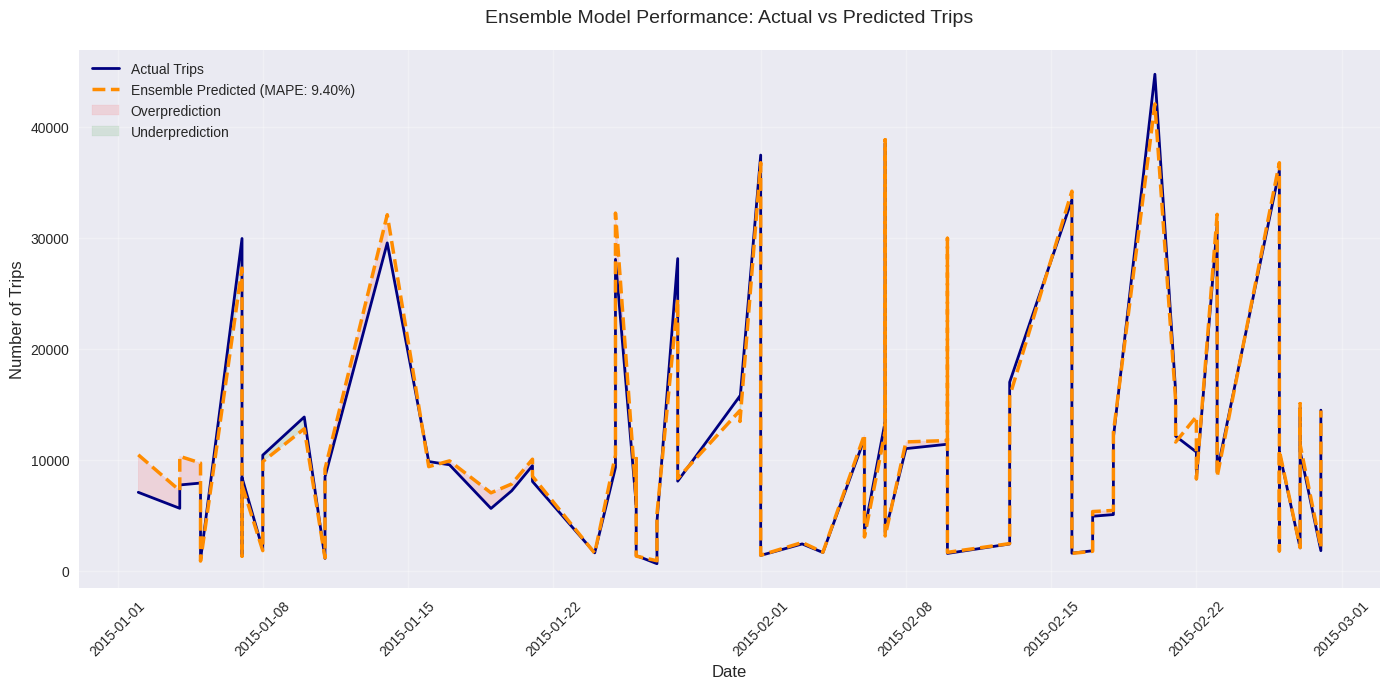

In [ ]:
plt.figure(figsize=(14, 7))

# Plot actual trips
plt.plot(test_with_date['date'], test_with_date['actual_trips'],
         label='Actual Trips', color='navy', linewidth=2)

# Plot ensemble predictions
plt.plot(test_with_date['date'], test_with_date['ensemble_predicted'],
         label=f'Ensemble Predicted (MAPE: {ensemble_mape:.2%})',
         color='darkorange', linestyle='--', linewidth=2.5)

# Highlight areas where ensemble differs significantly
plt.fill_between(test_with_date['date'],
                 test_with_date['actual_trips'],
                 test_with_date['ensemble_predicted'],
                 where=(test_with_date['ensemble_predicted'] > test_with_date['actual_trips']),
                 color='red', alpha=0.1, label='Overprediction')
plt.fill_between(test_with_date['date'],
                 test_with_date['actual_trips'],
                 test_with_date['ensemble_predicted'],
                 where=(test_with_date['ensemble_predicted'] < test_with_date['actual_trips']),
                 color='green', alpha=0.1, label='Underprediction')

# Customize
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.title("Ensemble Model Performance: Actual vs Predicted Trips", fontsize=14, pad=20)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Top 10 Busiest Days:
         date   trips
50 2015-02-20  100915
44 2015-02-14  100345
51 2015-02-21   98380
43 2015-02-13   98024
30 2015-01-31   92257
45 2015-02-15   89401
57 2015-02-27   88806
49 2015-02-19   88757
58 2015-02-28   88181
36 2015-02-06   85940


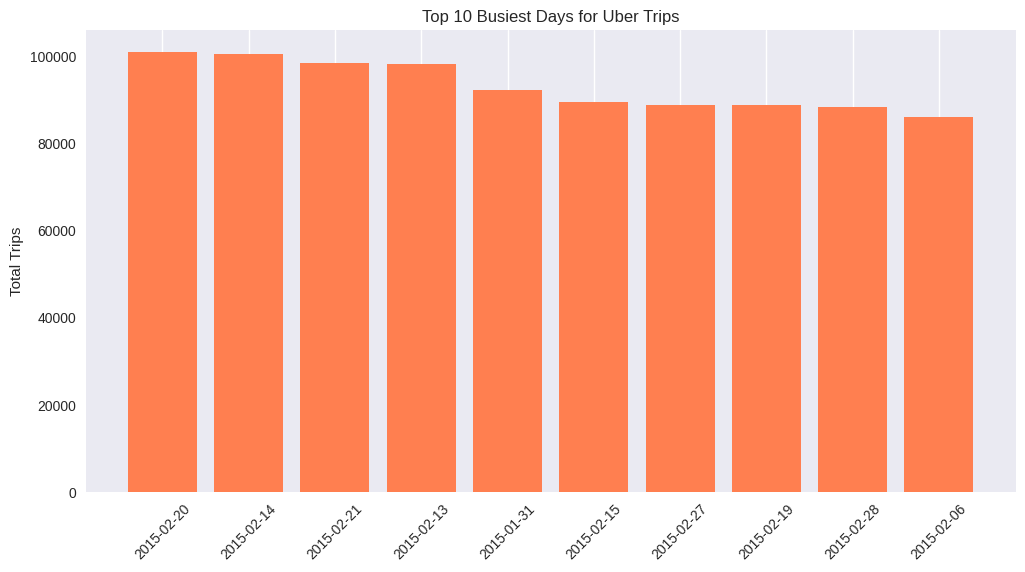

In [ ]:
#Daily Trip Trend Analysis
import matplotlib.dates as mdates

# Daily trip trends
daily_trips = df.groupby('date')['trips'].sum().reset_index()

# Top 10 busiest days
busiest_days = daily_trips.nlargest(10, 'trips')
print("Top 10 Busiest Days:")
print(busiest_days)

# Plot busiest days
plt.figure(figsize=(12, 6))
plt.bar(busiest_days['date'].astype(str), busiest_days['trips'], color='coral')
plt.title('Top 10 Busiest Days for Uber Trips')
plt.ylabel('Total Trips')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

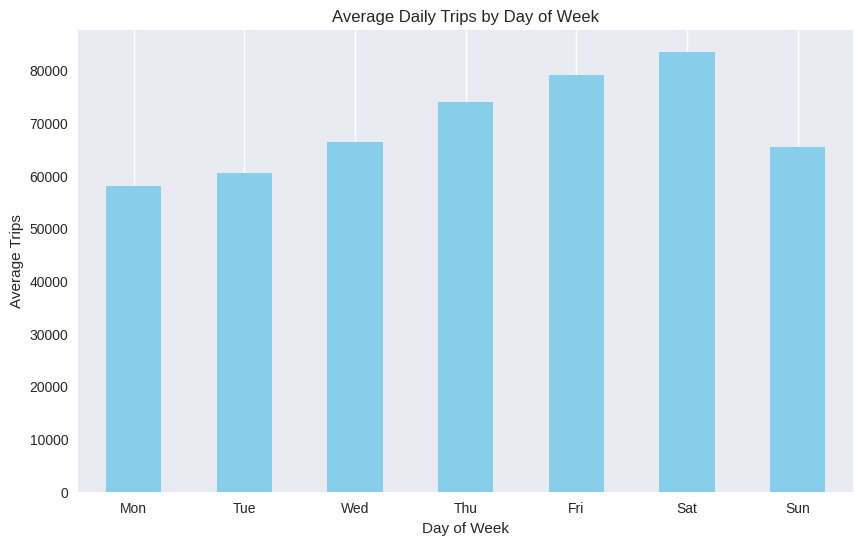


Weekend vs Weekday Average Trips:
weekend
False    67975.285714
True     75015.764706
Name: trips, dtype: float64


In [ ]:
# Add day of week and weekend flag
daily_trips['date'] = pd.to_datetime(daily_trips['date'])
daily_trips['day_of_week'] = daily_trips['date'].dt.dayofweek
daily_trips['weekend'] = daily_trips['day_of_week'].isin([5, 6])

# Average trips by day of week
weekday_avg = daily_trips.groupby('day_of_week')['trips'].mean()
weekday_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Plot
plt.figure(figsize=(10, 6))
weekday_avg.plot(kind='bar', color='skyblue')
plt.title('Average Daily Trips by Day of Week')
plt.ylabel('Average Trips')
plt.xlabel('Day of Week')
plt.xticks(range(7), weekday_names, rotation=0)
plt.grid(axis='y')
plt.show()

# Weekend vs weekday comparison
weekend_comparison = daily_trips.groupby('weekend')['trips'].mean()
print("\nWeekend vs Weekday Average Trips:")
print(weekend_comparison)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpw1y31xbx/b0m7kvsw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw1y31xbx/pvmhjwso.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87114', 'data', 'file=/tmp/tmpw1y31xbx/b0m7kvsw.json', 'init=/tmp/tmpw1y31xbx/pvmhjwso.json', 'output', 'file=/tmp/tmpw1y31xbx/prophet_model0ab9wl4w/prophet_model-20250422080725.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:07:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:07:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


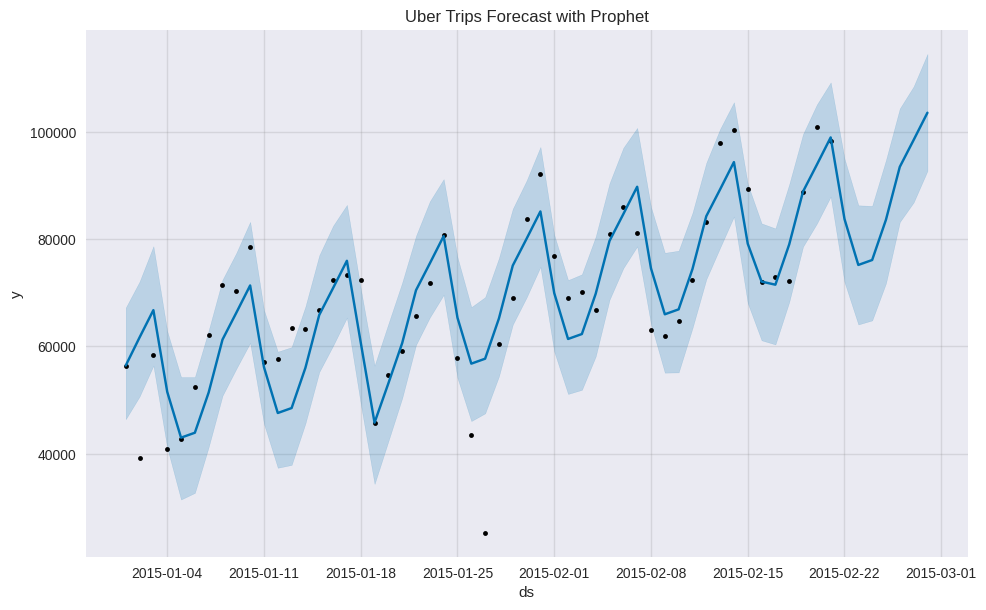

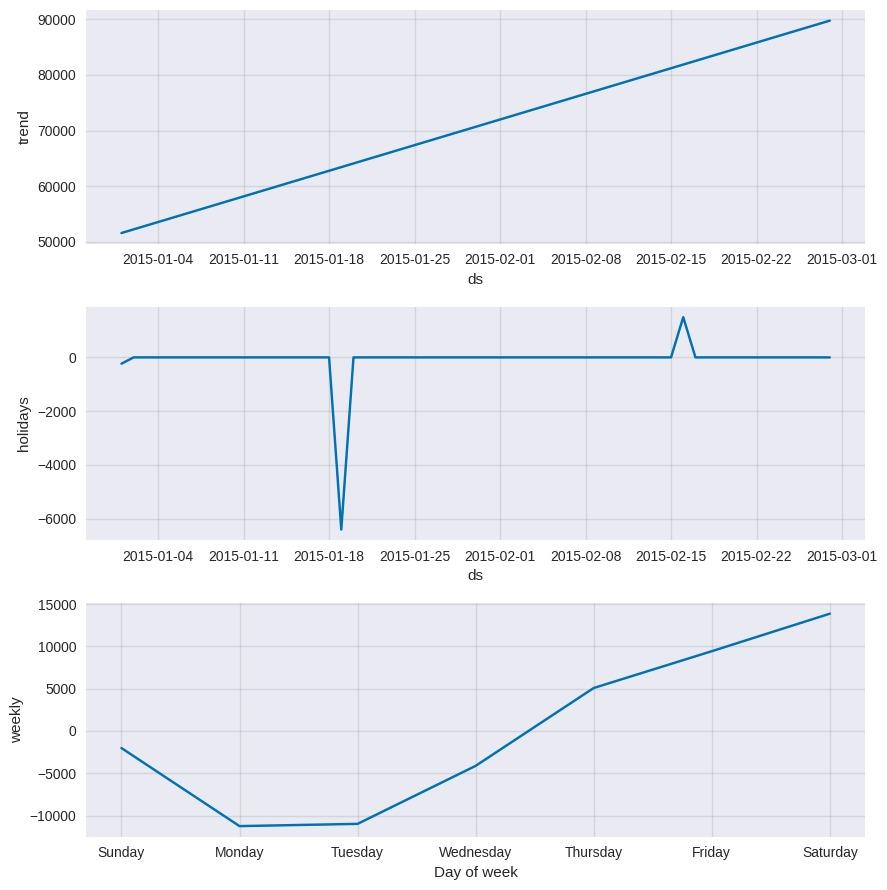

In [ ]:
# Time-series forecasting
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# Prepare data for Prophet
prophet_df = daily_trips[['date', 'trips']].rename(columns={'date': 'ds', 'trips': 'y'})

# Split into train/test (last 7 days as test)
train = prophet_df.iloc[:-7]
test = prophet_df.iloc[-7:]

# Create and fit model
model = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoint_prior_scale=0.05
)
model.add_country_holidays(country_name='US')
model.fit(train)

# Make future dataframe and predict
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)

# Plot results
fig1 = model.plot(forecast)
plt.title('Uber Trips Forecast with Prophet')
plt.show()

# Plot components
fig2 = model.plot_components(forecast)
plt.show()

# Evaluate predictions
predictions = forecast.iloc[-7:]['yhat'].values
actuals = test['y'].values


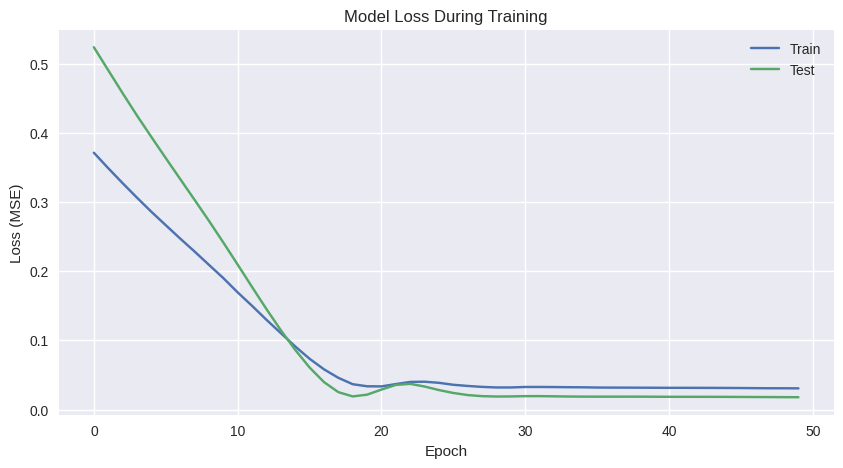

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Train RMSE: 174408638
Test RMSE: 101826531


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Prepare data
ts_data = daily_trips.set_index('date')['trips'].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler()
ts_data_scaled = scaler.fit_transform(ts_data)

# Create sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data)-window_size-1):
        X.append(data[i:(i+window_size), 0])
        y.append(data[i+window_size, 0])
    return np.array(X), np.array(y)

window_size = 7
X, y = create_sequences(ts_data_scaled, window_size)

# Split train/test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                   validation_data=(X_test, y_test), verbose=0)

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model Loss During Training')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
print(f"Train RMSE: {mean_squared_error(y_train_actual, train_predict):.0f}")
print(f"Test RMSE: {mean_squared_error(y_test_actual, test_predict):.0f}")

<Figure size 1200x800 with 0 Axes>

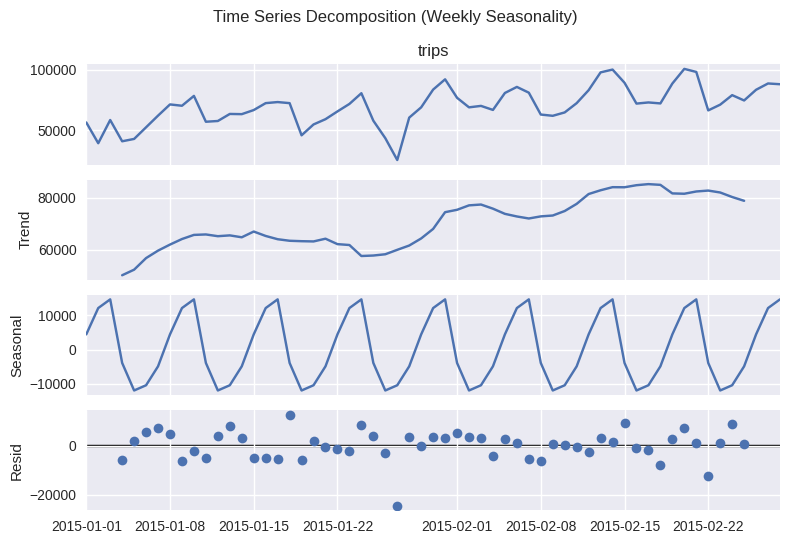

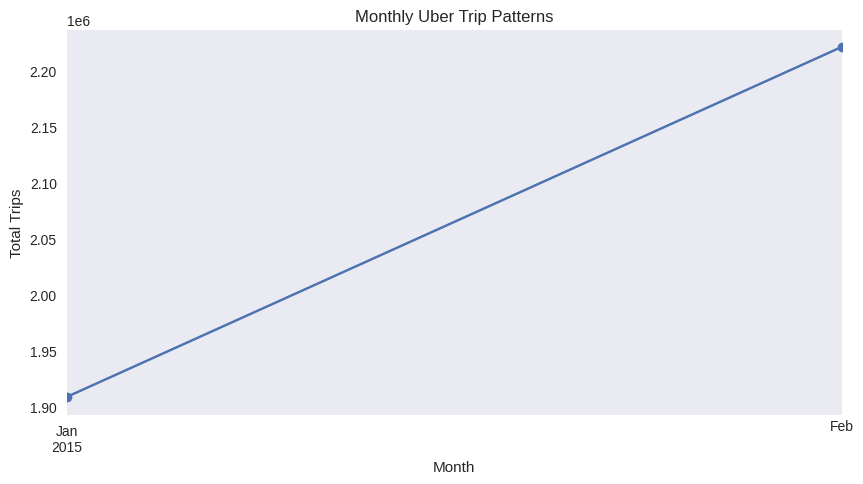

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set frequency
daily_trips_ts = daily_trips.set_index('date')['trips'].asfreq('D')

# Fill any missing dates with interpolation
daily_trips_ts = daily_trips_ts.interpolate()

# Decompose time series
result = seasonal_decompose(daily_trips_ts, model='additive', period=7)

# Plot decomposition
plt.figure(figsize=(12, 8))
result.plot()
plt.suptitle('Time Series Decomposition (Weekly Seasonality)')
plt.tight_layout()
plt.show()

# Monthly aggregation
monthly_trips = daily_trips.resample('M', on='date')['trips'].sum()

# Plot monthly pattern
plt.figure(figsize=(10, 5))
monthly_trips.plot(marker='o')
plt.title('Monthly Uber Trip Patterns')
plt.ylabel('Total Trips')
plt.xlabel('Month')
plt.grid()
plt.show()


Holiday vs Non-Holiday Average Trips:
is_holiday
False    70641.785714
True     58096.666667
Name: trips, dtype: float64


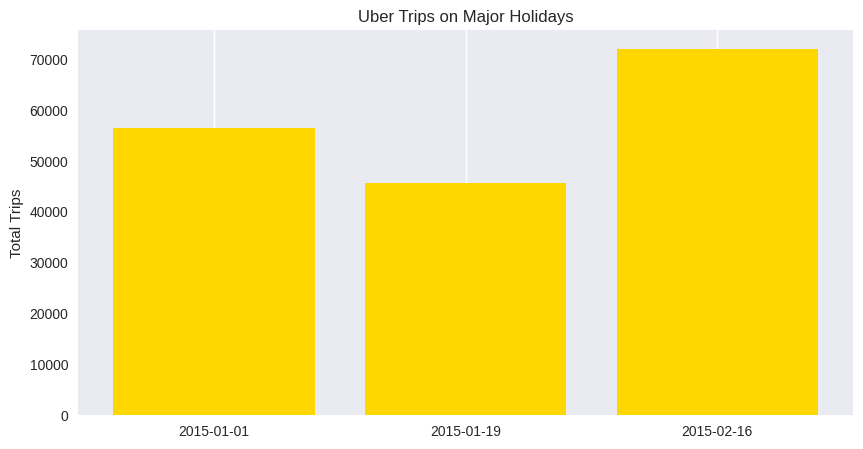

In [ ]:
import holidays

# Get US holidays for 2015
us_holidays = holidays.US(years=2015)

# Add holiday indicator
daily_trips['is_holiday'] = daily_trips['date'].isin(us_holidays)

# Compare holiday vs non-holiday trips
holiday_comparison = daily_trips.groupby('is_holiday')['trips'].mean()
print("\nHoliday vs Non-Holiday Average Trips:")
print(holiday_comparison)

# Plot specific holidays
major_holidays = ['2015-01-01', '2015-01-19', '2015-02-16']  # New Year's, MLK Day, Presidents Day
holiday_dates = pd.to_datetime(major_holidays)
holiday_data = daily_trips[daily_trips['date'].isin(holiday_dates)]

plt.figure(figsize=(10, 5))
plt.bar(holiday_data['date'].dt.strftime('%Y-%m-%d'), holiday_data['trips'], color='gold')
plt.title('Uber Trips on Major Holidays')
plt.ylabel('Total Trips')
plt.grid(axis='y')
plt.show()

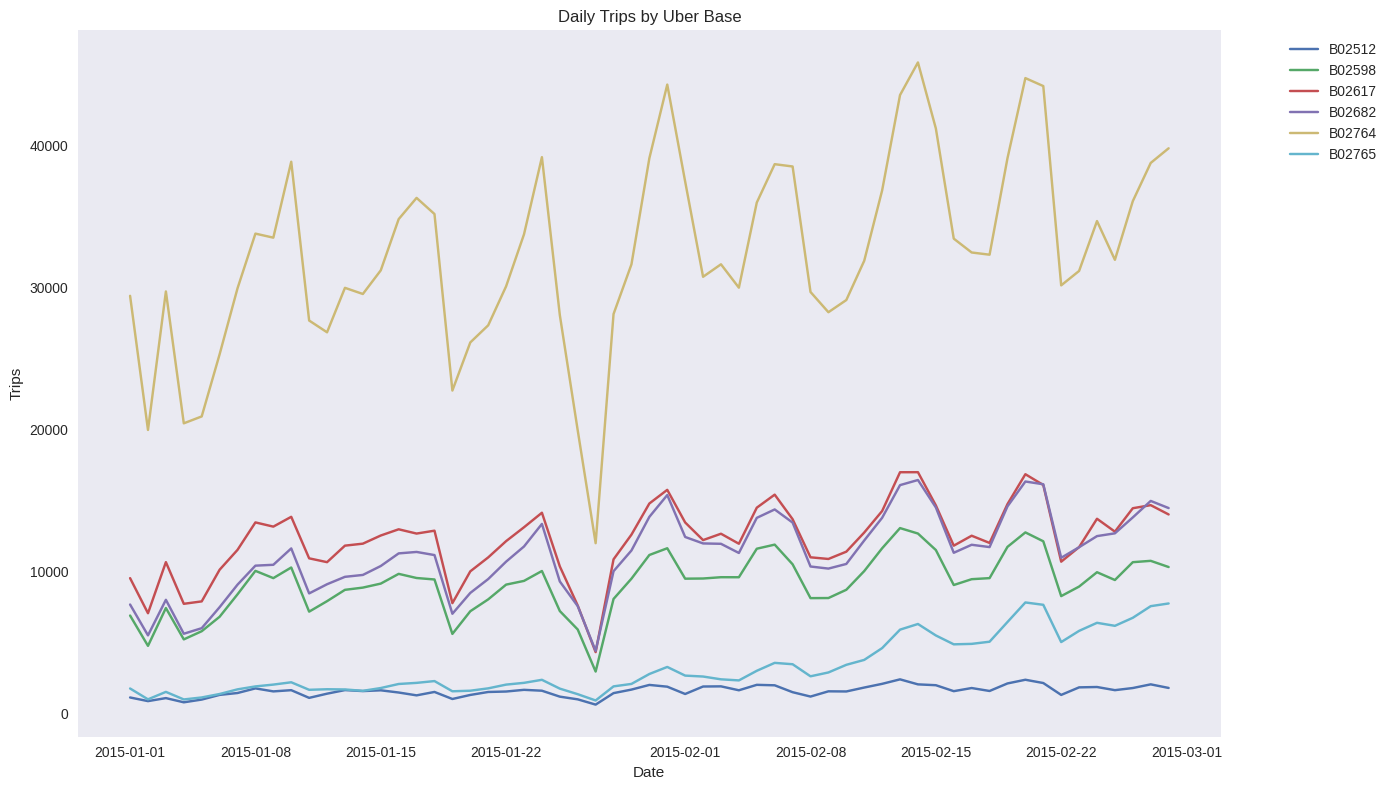

In [ ]:
# Get trips by base
base_trips = df.groupby(['dispatching_base_number', 'date'])['trips'].sum().unstack(0)

# Plot base-specific trends
plt.figure(figsize=(14, 8))
for base in base_trips.columns:
    plt.plot(base_trips.index, base_trips[base], label=base)
plt.title('Daily Trips by Uber Base')
plt.ylabel('Trips')
plt.xlabel('Date')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

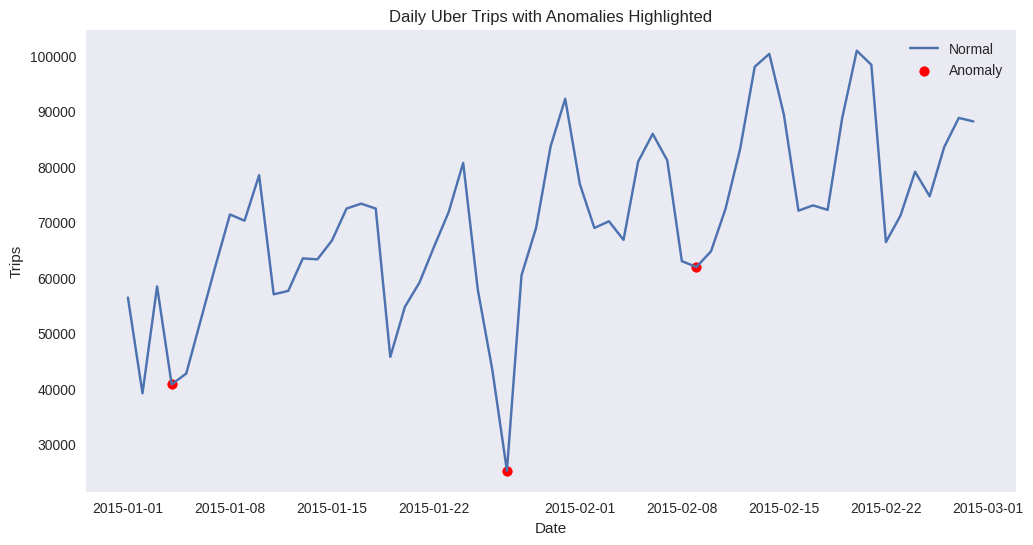


Detected Anomalies:
         date  trips
3  2015-01-04  40798
26 2015-01-27  25244
39 2015-02-09  61956


In [ ]:
from sklearn.ensemble import IsolationForest

# Prepare features for anomaly detection
anomaly_features = daily_trips.copy()
anomaly_features['day_of_week'] = anomaly_features['date'].dt.dayofweek
anomaly_features['month'] = anomaly_features['date'].dt.month
X_anomaly = anomaly_features[['trips', 'day_of_week', 'month']]

# Fit isolation forest
clf = IsolationForest(contamination=0.05, random_state=42)
anomaly_pred = clf.fit_predict(X_anomaly)

# Add anomaly flag to dataframe
anomaly_features['anomaly'] = anomaly_pred
anomalies = anomaly_features[anomaly_features['anomaly'] == -1]

# Plot anomalies
plt.figure(figsize=(12, 6))
plt.plot(anomaly_features['date'], anomaly_features['trips'], label='Normal')
plt.scatter(anomalies['date'], anomalies['trips'], color='red', label='Anomaly')
plt.title('Daily Uber Trips with Anomalies Highlighted')
plt.ylabel('Trips')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.show()

print("\nDetected Anomalies:")
print(anomalies[['date', 'trips']])

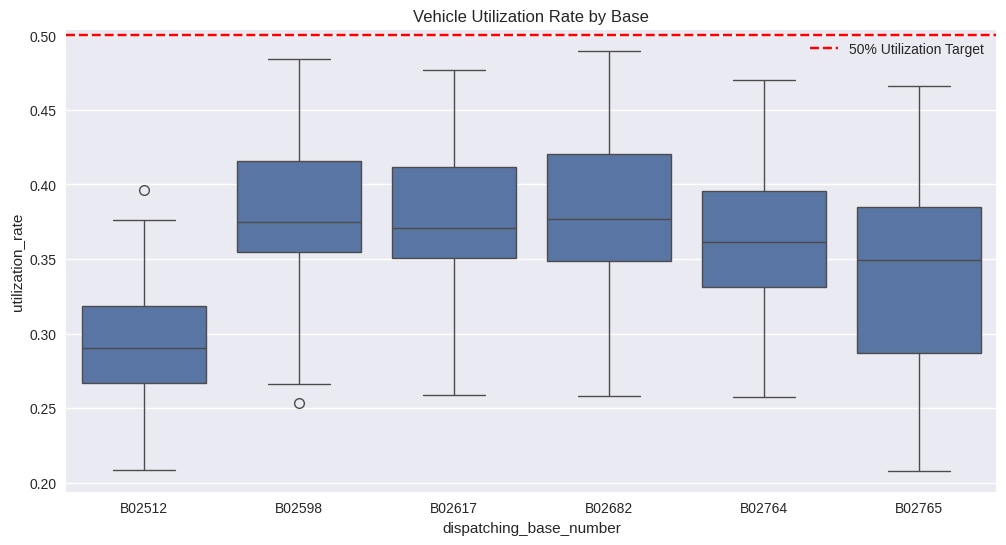

Base Efficiency Ranking:
                         utilization_rate  trips_per_vehicle
dispatching_base_number                                     
B02682                           0.381727           9.161441
B02598                           0.380580           9.133922
B02617                           0.376019           9.024466
B02764                           0.364757           8.754156
B02765                           0.337725           8.105404
B02512                           0.294726           7.073431


In [ ]:
#Operational Efficiency Analysis Analyze vehicle utilization and base performance metrics:
# Calculate operational metrics
df['trips_per_vehicle'] = df['trips'] / df['active_vehicles']
df['utilization_rate'] = df['trips'] / (df['active_vehicles'] * 24)

# Visualize base efficiency
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='dispatching_base_number', y='utilization_rate')
plt.title('Vehicle Utilization Rate by Base')
plt.axhline(y=0.5, color='r', linestyle='--', label='50% Utilization Target')
plt.legend()
plt.show()

# Identify underperforming bases
base_efficiency = df.groupby('dispatching_base_number').agg({
    'utilization_rate': 'mean',
    'trips_per_vehicle': 'mean'
}).sort_values('utilization_rate', ascending=False)

print("Base Efficiency Ranking:")
print(base_efficiency)

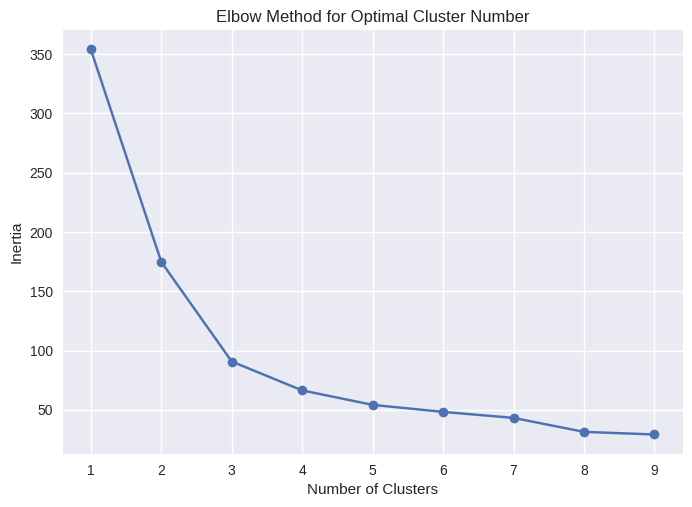

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Create features for clustering: trips by base per day
cluster_features = df.pivot_table(
    index='date',
    columns='dispatching_base_number',
    values='trips',
    fill_value=0
)

# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)

# Elbow method to determine optimal number of clusters
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,10), inertia, marker='o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Fit clustering model
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Create a new DataFrame to hold cluster labels with dates
cluster_df = pd.DataFrame({
    'date': cluster_features.index,
    'demand_cluster': cluster_labels
})

# Merge cluster labels back to original df
df = df.merge(cluster_df, on='date', how='left')

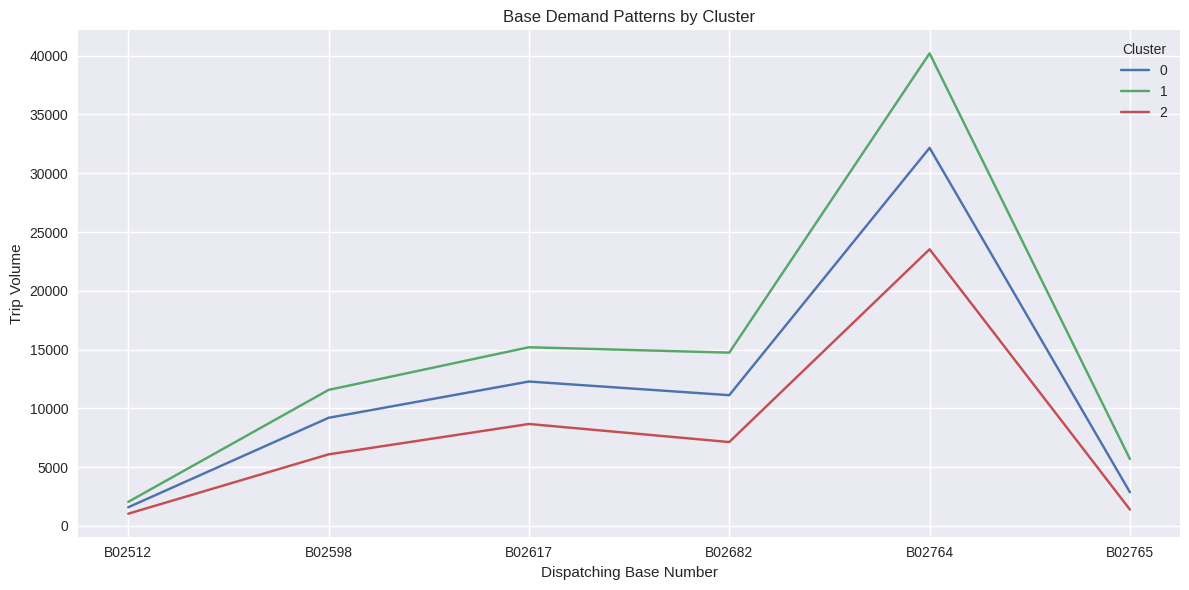

In [ ]:
# Get cluster centers and unscale them for interpretation
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Visualize the average trip demand per base per cluster
pd.DataFrame(cluster_centers, columns=cluster_features.columns).T.plot(
    kind='line',
    figsize=(12,6),
    title='Base Demand Patterns by Cluster'
)
plt.ylabel('Trip Volume')
plt.xlabel('Dispatching Base Number')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [ ]:
# Network Optimization Identify optimal vehicle allocation across bases
from scipy.optimize import minimize

# Prepare base demand data
base_demand = df.groupby('dispatching_base_number')['trips'].mean()

# Optimization function
def objective(x, demand):
    # x = vehicle allocation vector
    capacity = x * 24  # Max trips per vehicle per day
    unmet_demand = np.maximum(demand - capacity, 0)
    return np.sum(unmet_demand)  # Minimize unmet demand

# Constraints
total_vehicles = df['active_vehicles'].sum()
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - total_vehicles})
bounds = [(1, None)] * len(base_demand)  # At least 1 vehicle per base

# Initial guess (current allocation)
x0 = df.groupby('dispatching_base_number')['active_vehicles'].mean().values

# Solve optimization
result = minimize(objective, x0, args=(base_demand.values),
                 method='SLSQP', bounds=bounds,
                 constraints=constraints)

# Display optimal allocation
optimal_allocation = pd.Series(result.x, index=base_demand.index)
print("Optimal Vehicle Allocation:")
print(pd.DataFrame({
    'Current': df.groupby('dispatching_base_number')['active_vehicles'].mean(),
    'Optimal': optimal_allocation,
    'Improvement (%)': (optimal_allocation - df.groupby('dispatching_base_number')['active_vehicles'].mean()) /
                      df.groupby('dispatching_base_number')['active_vehicles'].mean() * 100
}))

Optimal Vehicle Allocation:
                             Current       Optimal  Improvement (%)
dispatching_base_number                                            
B02512                    222.457627  76053.689266     34087.944127
B02598                    994.118644  76825.350282      7627.986065
B02617                   1351.830508  77183.062147      5609.522138
B02682                   1210.694915  77041.926554      6263.446776
B02764                   3682.881356  79514.112994      2059.019130
B02765                    382.627119  76213.858757     19818.572167


In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="darkgrid")

# Load the dataset
df = pd.read_csv('Uber-Jan-Feb-FOIL.csv')

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract time features
df['Hour'] = df['date'].dt.hour
df['Day'] = df['date'].dt.day
df['Weekday'] = df['date'].dt.day_name()
df['Month'] = df['date'].dt.month_name()
df['Month_Num'] = df['date'].dt.month  # for sorting in heatmaps

# Aggregate by date for trip counts
daily = df.groupby('date').agg({'trips': 'sum'}).reset_index()
daily['Day'] = daily['date'].dt.day
daily['Weekday'] = daily['date'].dt.day_name()
daily['Month'] = daily['date'].dt.month_name()
daily['Month_Num'] = daily['date'].dt.month

In [ ]:
df.head()

,dispatching_base_number,date,active_vehicles,trips,Hour,Day,Weekday,Month,Month_Num
0,B02512,2015-01-01,190,1132,0,1,Thursday,January,1
1,B02765,2015-01-01,225,1765,0,1,Thursday,January,1
2,B02764,2015-01-01,3427,29421,0,1,Thursday,January,1
3,B02682,2015-01-01,945,7679,0,1,Thursday,January,1
4,B02617,2015-01-01,1228,9537,0,1,Thursday,January,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dispatching_base_number  354 non-null    object        
 1   date                     354 non-null    datetime64[ns]
 2   active_vehicles          354 non-null    int64         
 3   trips                    354 non-null    int64         
 4   Hour                     354 non-null    int32         
 5   Day                      354 non-null    int32         
 6   Weekday                  354 non-null    object        
 7   Month                    354 non-null    object        
 8   Month_Num                354 non-null    int32         
dtypes: datetime64[ns](1), int32(3), int64(2), object(3)
memory usage: 20.9+ KB


In [ ]:
df.describe(include = 'all')

,dispatching_base_number,date,active_vehicles,trips,Hour,Day,Weekday,Month,Month_Num
count,354,354,354.000000,354.000000,354.0,354.000000,354,354,354.000000
unique,6,NaN,NaN,NaN,NaN,NaN,7,2,NaN
top,B02512,NaN,NaN,NaN,NaN,NaN,Thursday,January,NaN
freq,59,NaN,NaN,NaN,NaN,NaN,54,186,NaN
mean,NaN,2015-01-30 00:00:00,1307.435028,11667.316384,0.0,15.288136,NaN,NaN,1.474576
min,NaN,2015-01-01 00:00:00,112.000000,629.000000,0.0,1.000000,NaN,NaN,1.000000
25%,NaN,2015-01-15 00:00:00,296.750000,2408.500000,0.0,8.000000,NaN,NaN,1.000000
50%,NaN,2015-01-30 00:00:00,1077.000000,9601.000000,0.0,15.000000,NaN,NaN,1.000000
75%,NaN,2015-02-14 00:00:00,1417.000000,13711.250000,0.0,23.000000,NaN,NaN,2.000000
max,NaN,2015-02-28 00:00:00,4395.000000,45858.000000,0.0,31.000000,NaN,NaN,2.000000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

# Reload the dataset
df = pd.read_csv('Uber-Jan-Feb-FOIL.csv')

# Convert date to datetime and extract temporal features
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month_name()
df['weekday'] = df['date'].dt.day_name()
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour

hourly_pattern = [0.02, 0.01, 0.005, 0.003, 0.005, 0.02, 0.05, 0.08,
                  0.07, 0.06, 0.05, 0.06, 0.07, 0.06, 0.05, 0.06,
                  0.08, 0.09, 0.08, 0.07, 0.06, 0.04, 0.03, 0.02]

# Apply synthetic hourly distribution
np.random.seed(42)
df['hourly_trips'] = df['trips'] * np.random.choice(hourly_pattern, size=len(df))

In [ ]:
df.head()

,dispatching_base_number,date,active_vehicles,trips,month,weekday,day,hour,hourly_trips
0,B02512,2015-01-01,190,1132,January,Thursday,1,0,56.60
1,B02765,2015-01-01,225,1765,January,Thursday,1,0,123.55
2,B02764,2015-01-01,3427,29421,January,Thursday,1,0,1471.05
3,B02682,2015-01-01,945,7679,January,Thursday,1,0,383.95
4,B02617,2015-01-01,1228,9537,January,Thursday,1,0,762.96


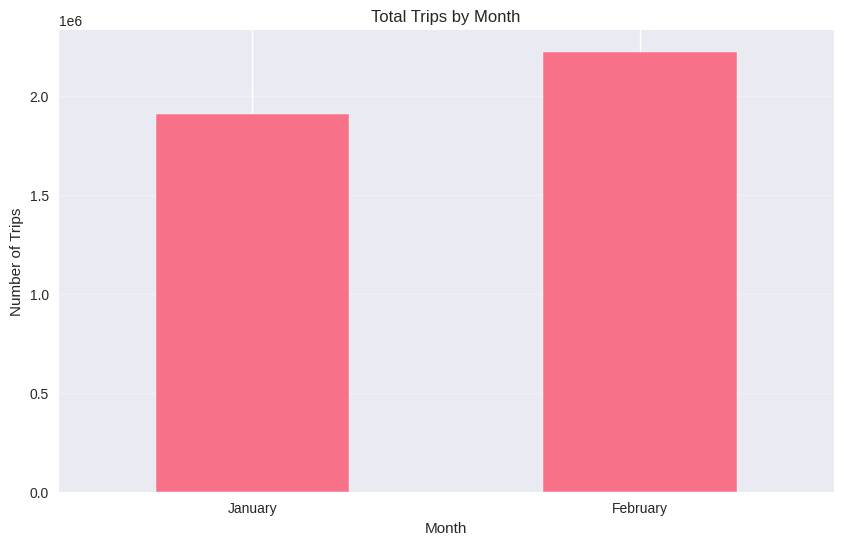

In [ ]:
## Number of trips by month
plt.figure(figsize=(10, 6))
month_order = ['January', 'February']
df.groupby('month')['trips'].sum().loc[month_order].plot(kind='bar')
plt.title('Total Trips by Month')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.xticks(rotation=360)
plt.grid(axis='y', alpha=0.3)
plt.show()

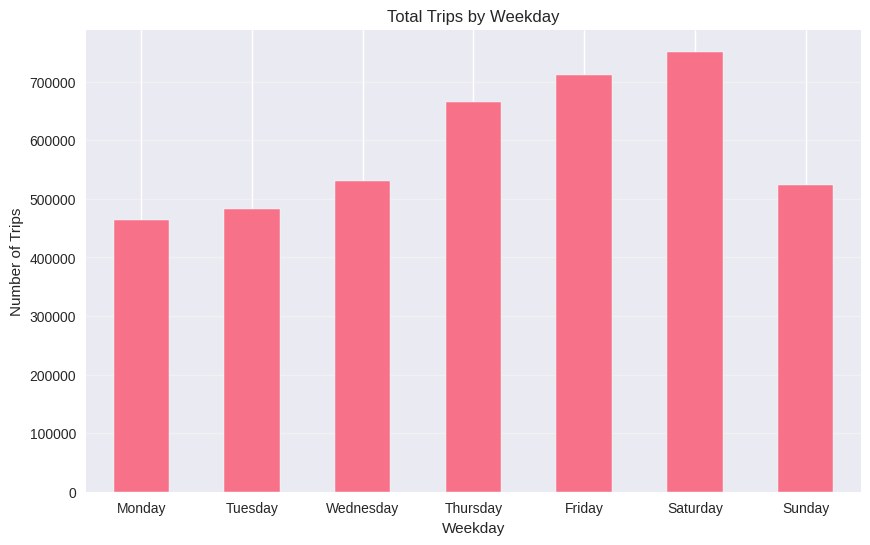

In [ ]:
## 3. Number of trips by weekday
plt.figure(figsize=(10, 6))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df.groupby('weekday')['trips'].sum().loc[weekday_order].plot(kind='bar')
plt.title('Total Trips by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Trips')
plt.xticks(rotation=360)
plt.grid(axis='y', alpha=0.3)
plt.show()

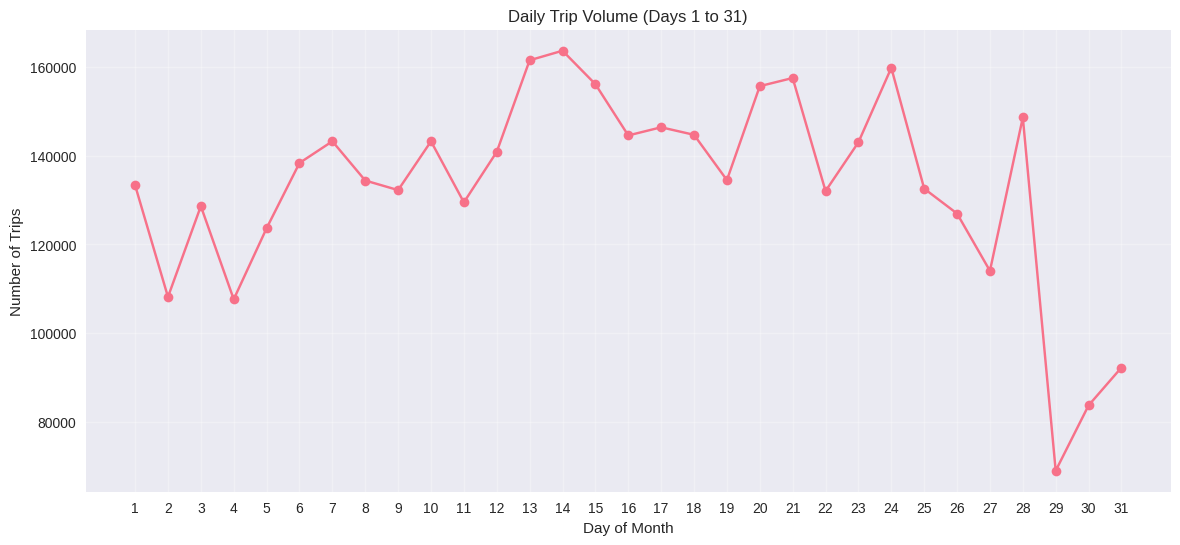

In [ ]:
import matplotlib.pyplot as plt

# Extract 'Day' from the 'date' column
df['date'] = pd.to_datetime(df['date'])  # Just in case
df['Day'] = df['date'].dt.day

#Group by 'Day' and plot
plt.figure(figsize=(14, 6))
df.groupby('Day')['trips'].sum().plot(kind='line', marker='o')
plt.title('Daily Trip Volume (Days 1 to 31)')
plt.xlabel('Day of Month')
plt.ylabel('Number of Trips')
plt.xticks(range(1, 32))  # Ensures x-axis shows 1 to 31
plt.grid(alpha=0.3)
plt.show()

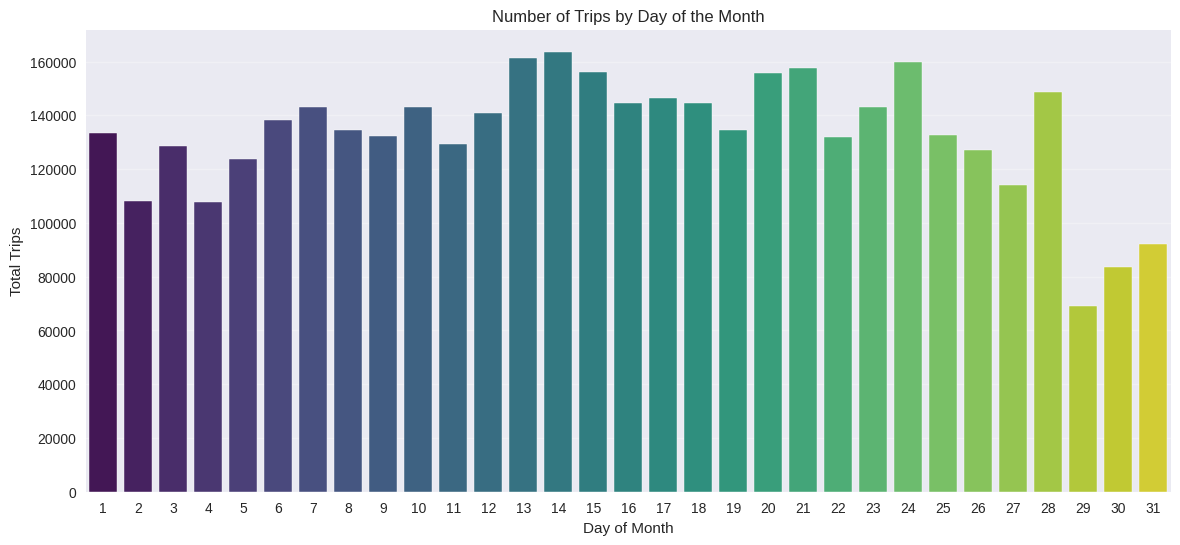

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Make sure 'Day' column is available
df['Day'] = pd.to_datetime(df['date']).dt.day

# Group by Day and sum trips
trips_by_day = df.groupby('Day')['trips'].sum().reset_index()

# Bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x='Day', y='trips', data=trips_by_day, palette='viridis')
plt.title('Number of Trips by Day of the Month')
plt.xlabel('Day of Month')
plt.ylabel('Total Trips')
plt.xticks(range(0, 31), [str(i) for i in range(1, 32)])  # Ensures x-axis is 1-31
plt.grid(axis='y', alpha=0.3)
plt.show()

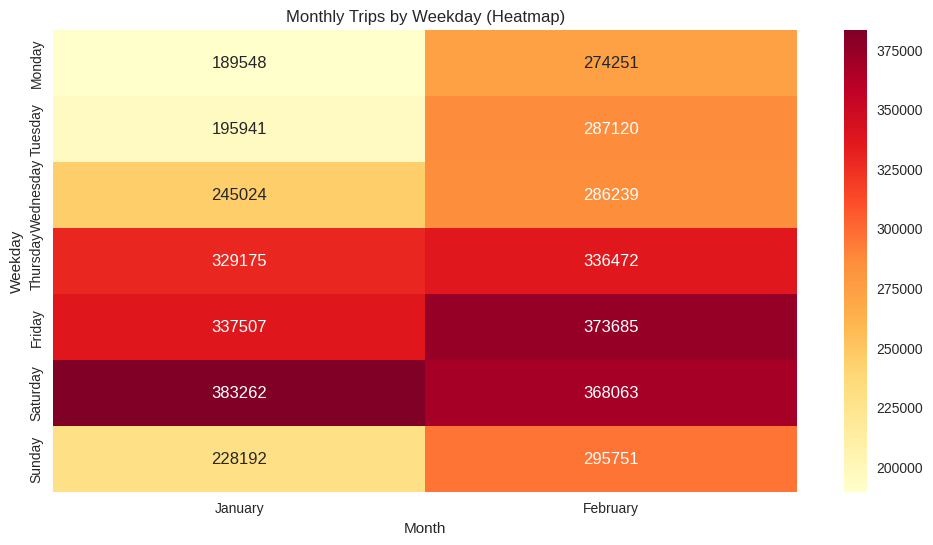

In [ ]:
## 7. Number of trips by weekday and month
weekday_month = df.groupby(['weekday', 'month'])['trips'].sum().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(weekday_month.loc[weekday_order][month_order], cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Monthly Trips by Weekday (Heatmap)')
plt.xlabel('Month')
plt.ylabel('Weekday')
plt.show()

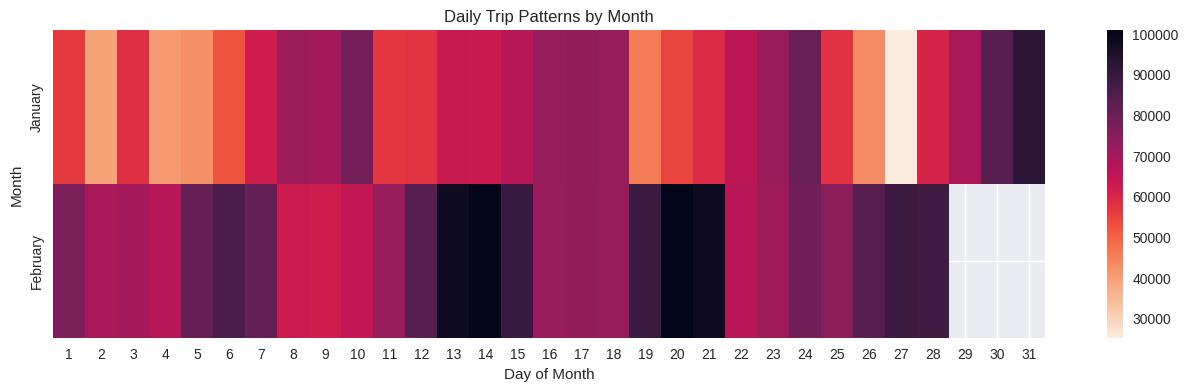

In [ ]:
## 10. Heatmap by Month and Day
month_day = df.groupby(['month', 'day'])['trips'].sum().unstack()
plt.figure(figsize=(16, 4))
sns.heatmap(month_day.loc[month_order], cmap='rocket_r', annot=False)
plt.title('Daily Trip Patterns by Month')
plt.xlabel('Day of Month')
plt.ylabel('Month')
plt.show()

In [ ]:
from matplotlib.animation import FuncAnimation

# Create animation of daily patterns
fig, ax = plt.subplots(figsize=(10, 6))
def update(day):
    ax.clear()
    day_data = df[df['day'] == day]
    day_data.groupby('hour')['hourly_trips'].sum().plot(ax=ax)
    ax.set_title(f'Hourly Pattern - Day {day}')
    ax.set_ylim(0, df.groupby('hour')['hourly_trips'].sum().max()*1.1)

ani = FuncAnimation(fig, update, frames=range(1, 29), interval=500)
plt.close()
# ani.save('daily_patterns.gif', writer='pillow')

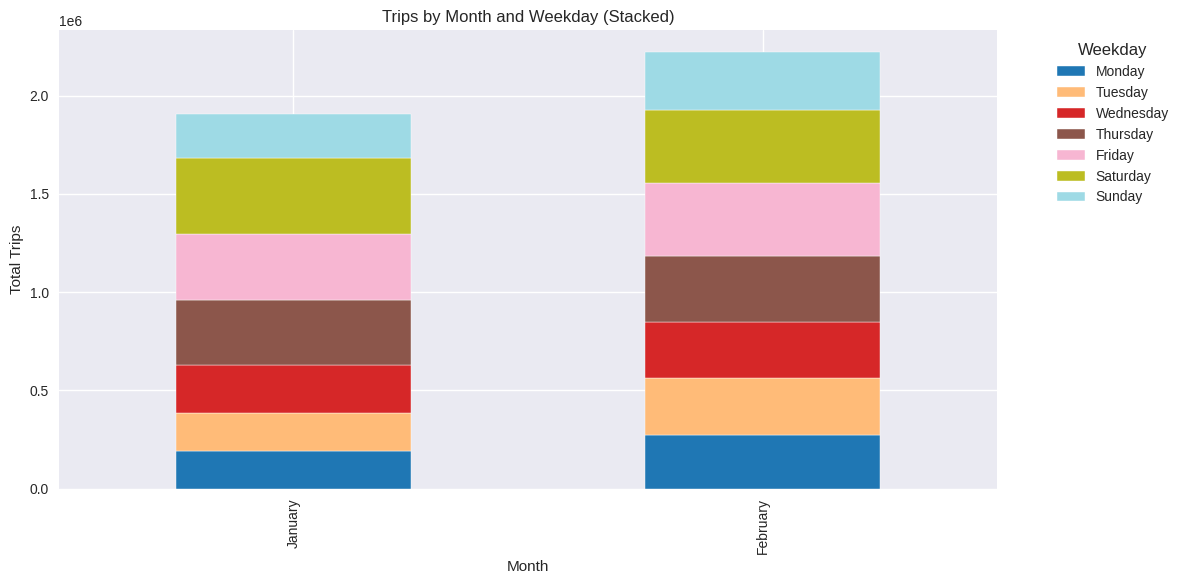

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime and features exist
df['date'] = pd.to_datetime(df['date'])
df['Month'] = df['date'].dt.month_name()
df['Weekday'] = df['date'].dt.day_name()

# Group by Month and Weekday
grouped = df.groupby(['Month', 'Weekday'])['trips'].sum().unstack().fillna(0)

# Reorder months and weekdays
month_order = ['January', 'February']
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped = grouped.reindex(index=month_order, columns=weekday_order)

# Plot stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Trips by Month and Weekday (Stacked)')
plt.ylabel('Total Trips')
plt.xlabel('Month')
plt.legend(title='Weekday', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

After Hyperparameter Tuning
R² Score: 0.9814
RMSE: 31.23